# Exploratory Data Analysis (EDA) of UFC dataset

Created by Jan Baljan for course on Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

## 1. Read data and check column

In [2]:
df = pd.read_csv("../datasets/data.csv")

df.head()

R_fighter            B_fighter         Referee        date  \
0  Anthony Smith  Khalil Rountree Jr.      Mark Smith  2023-12-09   
1     Song Kenan        Kevin Jousset      Mark Smith  2023-12-09   
2  HyunSung Park         Shannon Ross  Keith Peterson  2023-12-09   
3   JunYong Park          Andre Muniz   Chris Tognoni  2023-12-09   
4    Song Yadong      Chris Gutierrez       Herb Dean  2023-12-09   

                 location Winner  title_bout      weight_class  B_avg_KD  \
0  Las Vegas, Nevada, USA   Blue       False  LightHeavyweight  0.846558   
1  Las Vegas, Nevada, USA   Blue       False      Welterweight  0.000000   
2  Las Vegas, Nevada, USA    Red       False         Flyweight  0.000000   
3  Las Vegas, Nevada, USA   Blue       False      Middleweight  0.000000   
4  Las Vegas, Nevada, USA    Red       False      Bantamweight  0.210938   

   B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  B_avg_TD_pct  \
0      0.003906           0.513517               0.442042      0.000000   
1      0.000000           0.500000               0.660000      1.000000   
2      1.000000           0.455000               0.645000      0.000000   
3      0.000000           0.514062               0.422656      0.602187   
4      0.250000           0.550205               0.284424      0.024414   

   B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  B_avg_REV  \
0          0.013328       0.000977           0.000122   0.000000   
1          0.000000       1.000000           0.000000   0.000000   
2          0.000000       0.000000           0.000000   0.000000   
3          0.789062       0.218750           1.000000   0.000000   
4          0.335195       0.007812           0.024414   0.009766   

   B_avg_opp_REV  B_avg_SIG_STR_att  B_avg_SIG_STR_landed  \
0       0.000000          91.936035             37.195679   
1       0.000000          58.000000             29.000000   
2       0.000000           3.500000              1.500000   
3       0.265625          55.031250             26.000000   
4       0.000000         147.211914             83.077148   

   B_avg_opp_SIG_STR_att  B_avg_opp_SIG_STR_landed  B_avg_TOTAL_STR_att  \
0              88.720215                 41.244995            93.035400   
1              59.000000                 39.000000            69.000000   
2              12.500000                  8.000000             3.500000   
3              72.015625                 32.312500            79.546875   
4             125.591797                 38.767578           151.637695   

   B_avg_TOTAL_STR_landed  B_avg_opp_TOTAL_STR_att  \
0               38.033447                92.940186   
1               39.000000                66.000000   
2                1.500000                13.500000   
3               42.093750                91.703125   
4               86.843750               132.469727   

   B_avg_opp_TOTAL_STR_landed  B_avg_TD_att  B_avg_TD_landed  \
0                   44.925903      0.125000         0.000000   
1                   45.000000      1.000000         1.000000   
2                    9.000000      0.000000         0.000000   
3                   47.562500      3.515625         1.734375   
4                   45.074219      0.122070         0.025391   

   B_avg_opp_TD_att  B_avg_opp_TD_landed  B_avg_HEAD_att  B_avg_HEAD_landed  \
0          1.404053             0.065430       73.664795          22.621338   
1          0.000000             0.000000       44.000000          18.000000   
2          0.000000             0.000000        1.500000           0.500000   
3          1.421875             1.312500       42.562500          15.812500   
4          2.666992             1.130859       75.183594          33.996094   

   B_avg_opp_HEAD_att  B_avg_opp_HEAD_landed  B_avg_BODY_att  \
0           67.108032              23.292358       10.156006   
1           37.000000              20.000000        5.000000   
2            8.500000               4.500000        0.500000   
3           56.7

In [312]:
df.duplicated().sum()

0

### 1.1. Column information

There are 144 features divided in features for the 'Red corner' fighter and the 'Blue corner' fighter. In addition, there are some generic features. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(118), int64(16), object(9)
memory usage: 8.1+ MB


In [4]:
red_cols = []
blue_cols = []
generic_cols = []

for col in df.columns:
    # select right list to append col based on col starting with R_ or B_
    # Python treats booleans as ordinary numbers
    (generic_cols, red_cols, blue_cols)[col.startswith("R_") or 2 * col.startswith("B_")].append(col)

print(f"Red fighter features:  {len(red_cols)}")
print(f"Blue fighter features: {len(blue_cols)}")
print(f"Generic features:      {len(generic_cols)}")

Red fighter features:  69
Blue fighter features: 69
Generic features:      6


In [280]:
df.describe(include='all')

R_fighter        B_fighter    Referee        date  \
count         7424             7424       7391        7424   
unique        1772             2269        217         667   
top     Jim Miller  Jeremy Stephens  Herb Dean  2016-11-19   
freq            33               21       1091          25   
mean           NaN              NaN        NaN         NaN   
std            NaN              NaN        NaN         NaN   
min            NaN              NaN        NaN         NaN   
25%            NaN              NaN        NaN         NaN   
50%            NaN              NaN        NaN         NaN   
75%            NaN              NaN        NaN         NaN   
max            NaN              NaN        NaN         NaN   

                      location Winner title_bout weight_class     B_avg_KD  \
count                     7424   7422       7424         7424  5797.000000   
unique                     168      3          2           14          NaN   
top     Las Vegas, Nevada, USA    Red      False  Lightweight          NaN   
freq                      2422   4780       7007         1285          NaN   
mean                       NaN    NaN        NaN          NaN     0.244546   
std                        NaN    NaN        NaN          NaN     0.372100   
min                        NaN    NaN        NaN          NaN     0.000000   
25%                        NaN    NaN        NaN          NaN     0.000000   
50%                        NaN    NaN        NaN          NaN     0.016602   
75%                        NaN    NaN        NaN          NaN     0.500000   
max                        NaN    NaN        NaN          NaN     5.000000   

        B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  B_avg_TD_pct  \
count    5797.000000        5797.000000            5797.000000   5797.000000   
unique           NaN                NaN                    NaN           NaN   
top              NaN                NaN                    NaN           NaN   
freq             NaN                NaN                    NaN           NaN   
mean        0.178229           0.460754               0.443315      0.281323   
std         0.327944           0.127838               0.129837      0.267859   
min         0.000000           0.000000               0.000000      0.000000   
25%         0.000000           0.385469               0.362500      0.019836   
50%         0.000000           0.458437               0.440000      0.231289   
75%         0.250000           0.535000               0.518750      0.481875   
max         4.000000           1.000000               1.000000      1.000000   

        B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT    B_avg_REV  \
count        5797.000000    5797.000000        5797.000000  5797.000000   
unique               NaN            NaN                NaN          NaN   
top                  NaN            NaN                NaN          NaN   
freq                 NaN            NaN                NaN          NaN   
mean            0.264558       0.441875           0.382575     0.152350   
std             0.262208       0.686745           0.627321     0.340133   
min             0.000000       0.000000           0.000000     0.000000   
25%             0.034526       0.000000           0.000000     0.000000   
50%             0.200000       0.125000           0.063477     0.000000   
75%             0.416250       0.626038           0.500000     0.125000   
max             1.000000       8.000000           7.000000     6.000000   

        B_avg_opp_REV  B_avg_SIG_STR_att  B_avg_SIG_STR_landed  \
count     5797.000000        5797.000000           5797.000000   
unique            NaN                NaN                   NaN   
top               NaN                NaN                   NaN   
freq              NaN                NaN                   NaN   
mean         0.140811          80.048638             35.799515   
std          0.323526          52.878713             23.776403   
min

### 1.2. Missing data analysis

We can check the amount of missing values in the dataset.

In [90]:
total_missing_values = df.isna().sum().sum()
amt_values = df.shape[0]*df.shape[1]
print(f"Total number of missing values: {total_missing_values} of {amt_values}, i.e., {total_missing_values/amt_values:.4f}% missing values")

Total number of missing values: 121106 of 1069056, i.e., 0.1133% missing values


<AxesSubplot: >

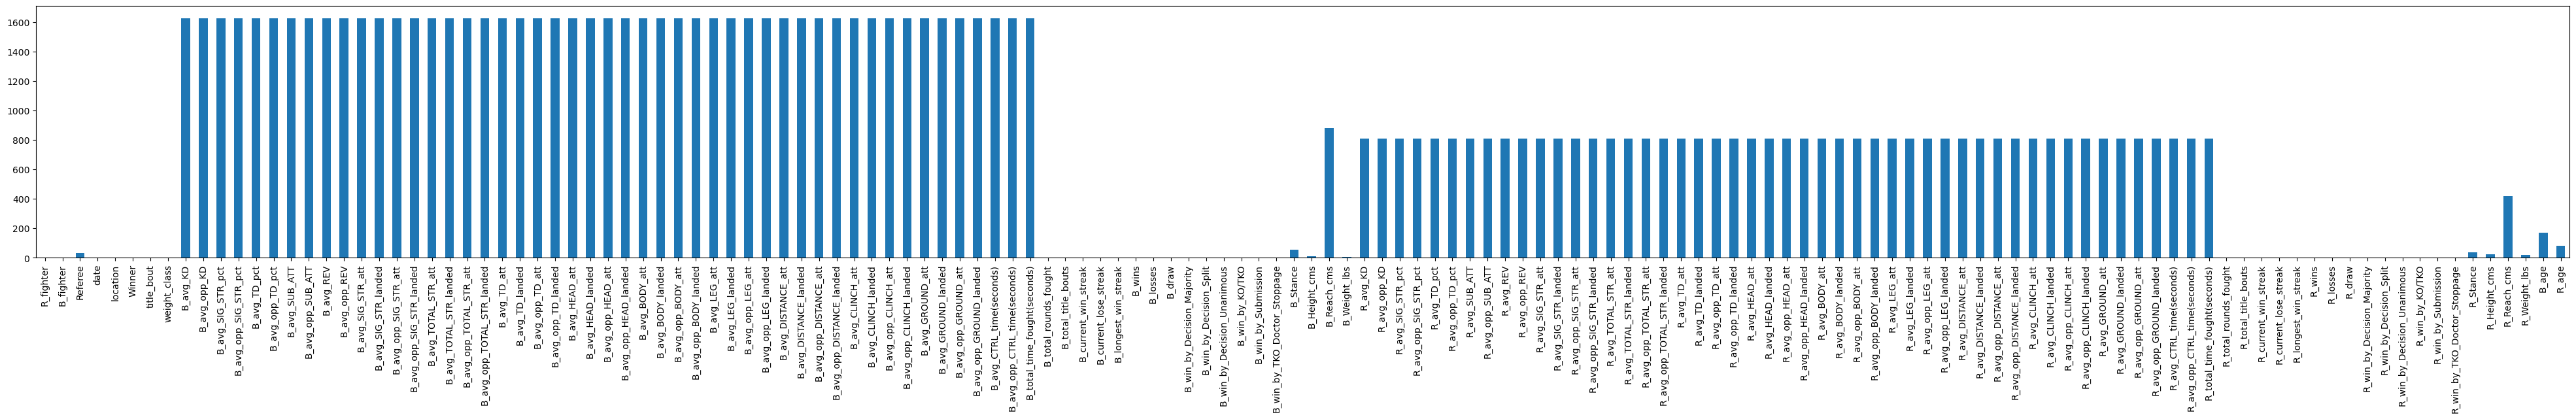

In [124]:
df.isnull().sum().plot(kind='bar', figsize=(50, 5))

It seems that there are a lot of missing values. We can visually see certain patterns of missingness from the above barplot. A further analysis can be performed by considering the **nullity correlation matrix**, which makes these relationships between missing variables a bit more explicit. Suppose that we encode missing values with `True` (or 1) and non-missing values with `False` (or 0). Computing the correlation matrix in the standard way, via Pearson's correlation coefficient, we get the linear relationship between each variable that has missing values. 

For random variables $X$ and $Y$, the nullity correlation coefficient $\rho$ between them tells us:
- if $\rho = 1$, then there is **identical missingness**, which means that both $X$ and $Y$ may have missing and non-missing values, but the missing values are located at the exact same indices for both variables. 
- if $\rho = -1$, then there is **opposite missingness**, which means that both $X$ and $Y$ may have missing and non-missing values, but if one's value is missing the other's value is non-missing, and vice versa.
- if $\rho = 0$, then the missingness patterns between $X$ and $Y$ appear to be **unrelated** with respect to each other.

<AxesSubplot: >

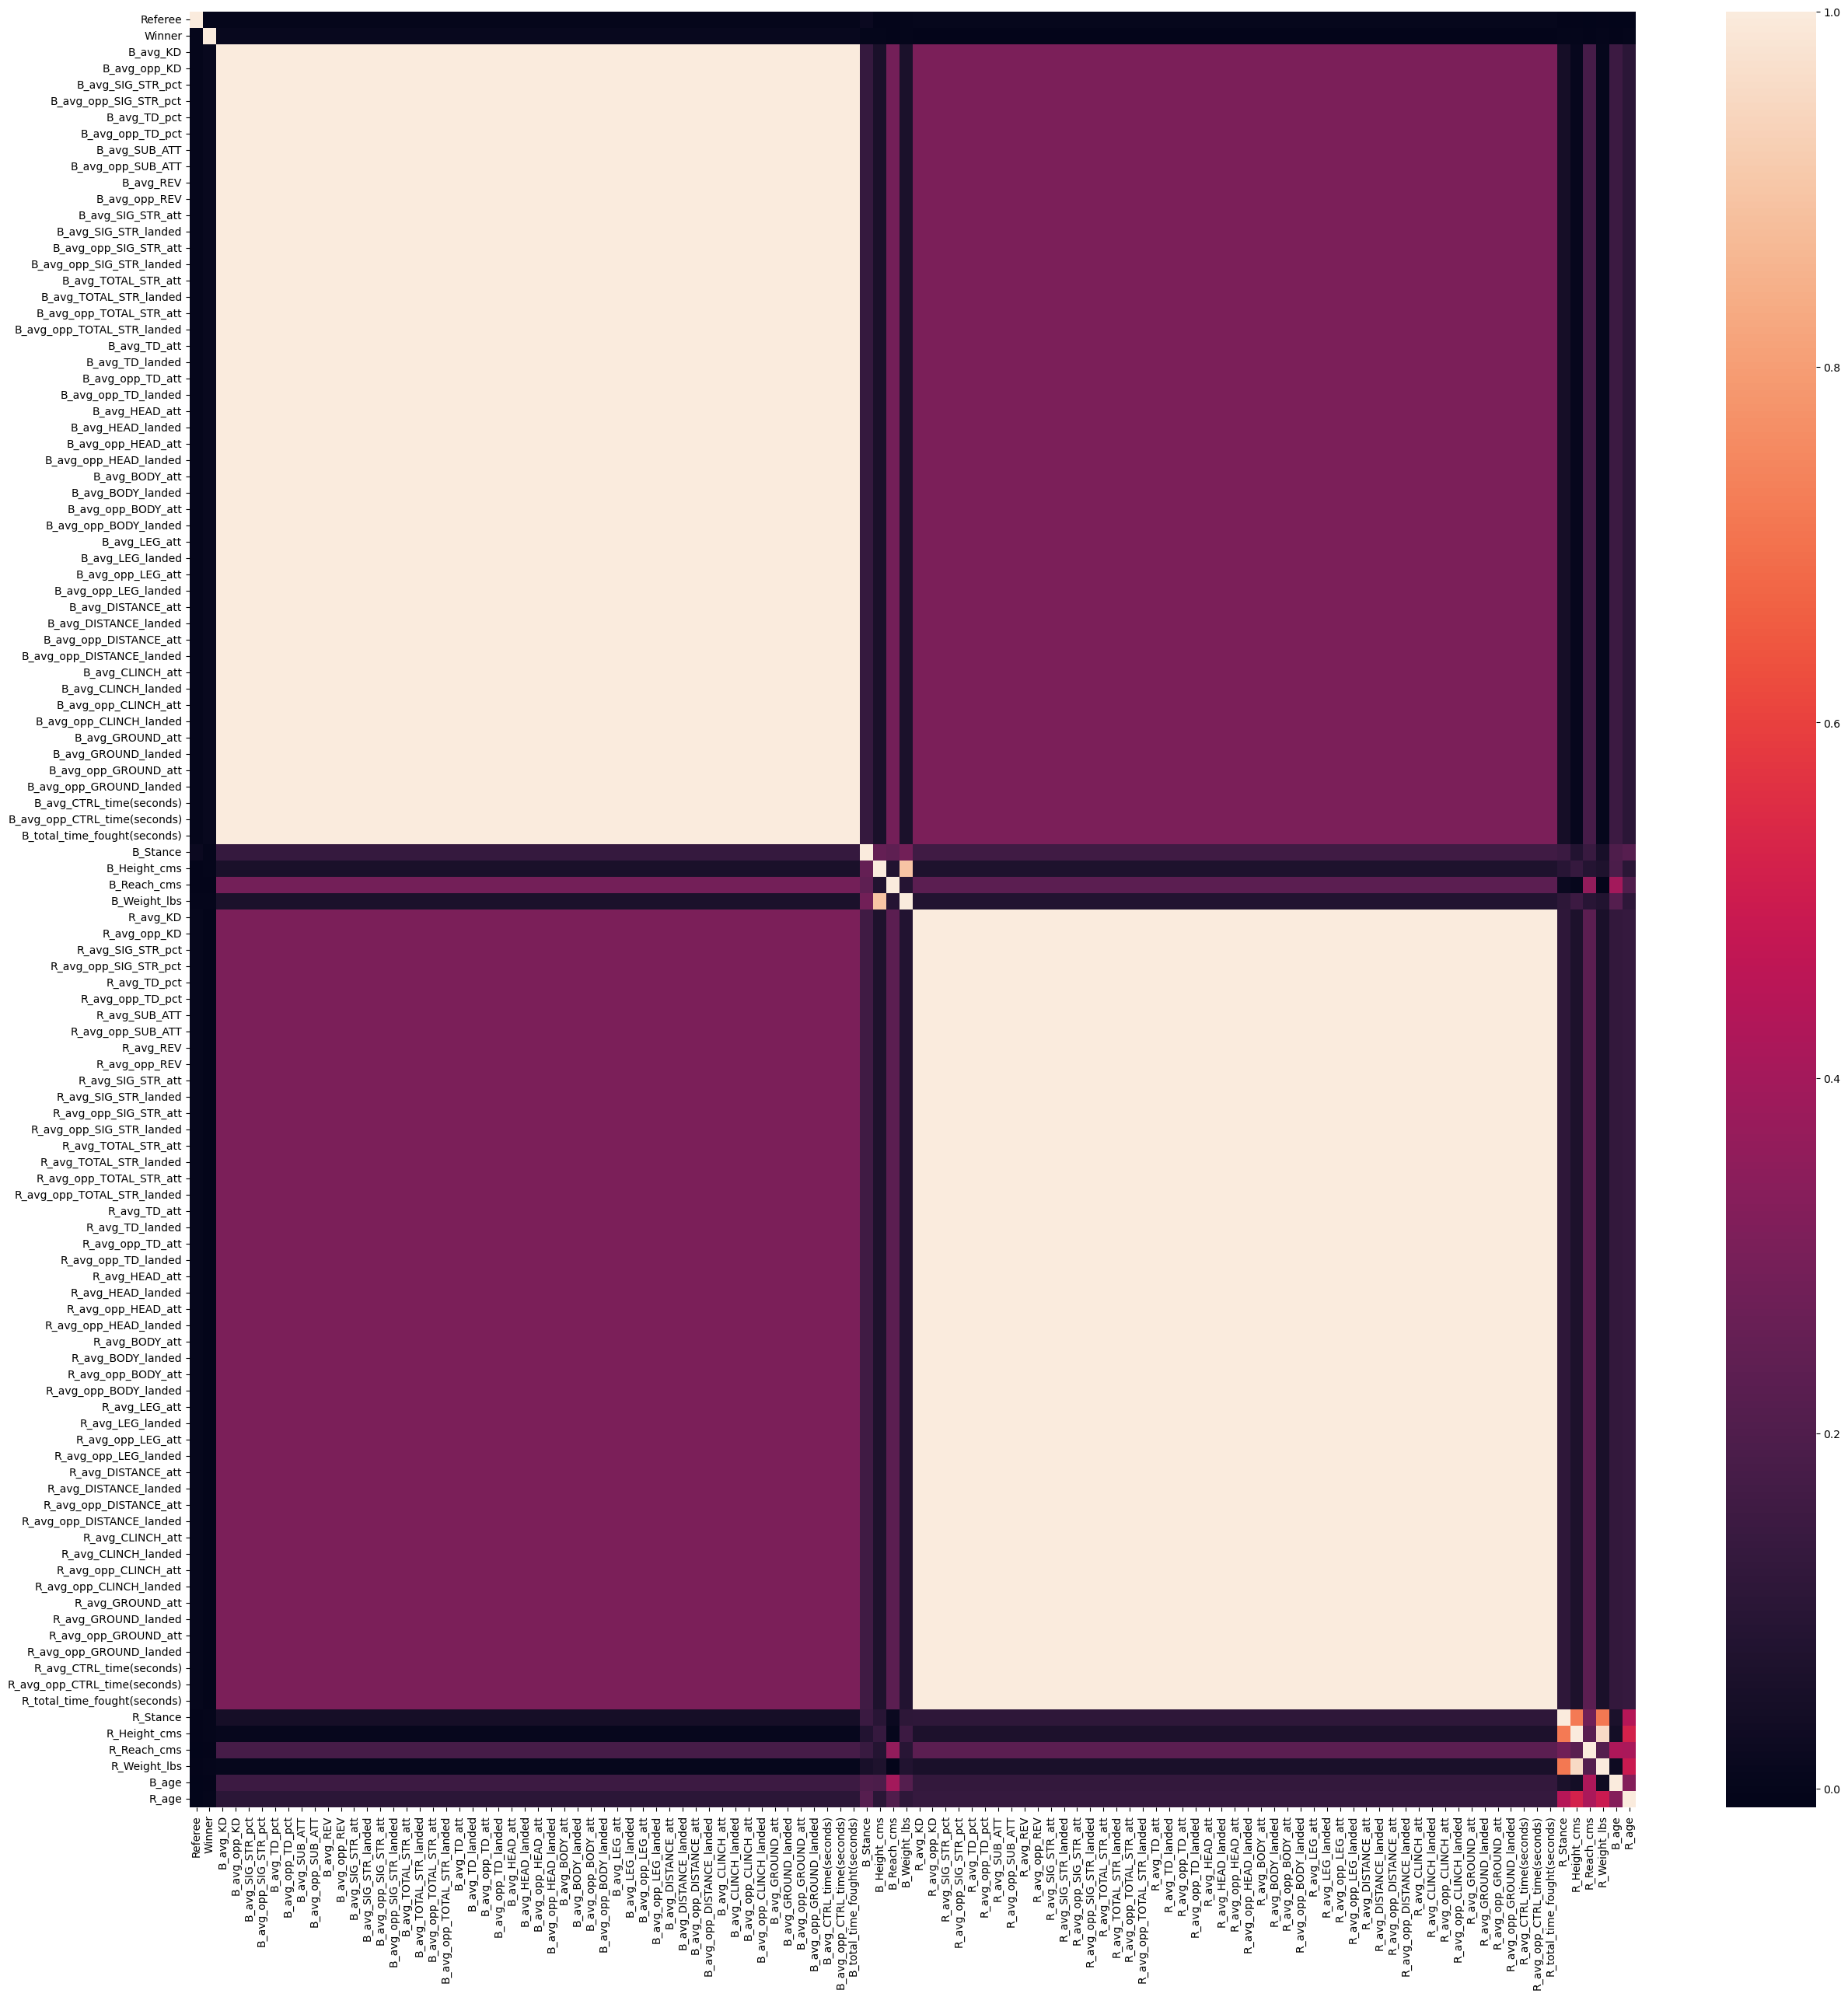

In [115]:
# take only columns with missing values and encode missingness (True/False), then compute corr matrix
missing_values_corr = df.loc[:, df.isnull().any()].isnull().corr()
plt.figure(figsize=(30, 30))
sns.heatmap(missing_values_corr)

In the above, it is clear that the red/blue fighter statistics have correlated missingness (upper left quadrant and lower right quadrant). This implies that given one of the corner colors (red/blue), if one of the values is missing, that all of the corresponding values related to the red/blue corner are missing. A logical explanation is that fighter who debut do not have a historic account of previous matches **within** the UFC. Therefore, their fighter summary statistics are empty (missing). As a case study to see this, let's examine a particular fighter, `Jon Jones`. 

In [123]:
df[df['R_fighter'] == 'Jon Jones'].isnull().sum(axis=1)

429      0
1956     0
2246     0
2430     0
2500     0
3788     0
4389     0
4754     0
5015     0
5163     0
5389     0
5539     0
5643     0
5723     0
5895     0
6038     0
6279     0
6382     0
6481    99
dtype: int64

We can see that the first fight of `Jon Jones`, indexed in the dataset at 6481, is the only record that contains missing values. Note that this also applies to the case where both fighters are competing for the first time. 

This is how far the exploration on missing data will extend. In the notebook on [data cleaning](data_cleaning.ipynb), we will try to manipulate the dataset, so that we get clean data that can be used during modeling. 

## 2. Exploring generic features

First, we can analyse and explore the distributions of the *generic* features by counting/time-series. For each, some questions were formulated:
- **Referee**
  - Who has referee'd the most (by weight class, by title bout)?
- **Date**
  - How many matches and how far apart over time?
- **Location**
  - What is the distribution of matches in certain locations?
- **Winner**
  - What is the distribution of red/blue wins?
  - What is the distribution of red/blue wins given weight class?

In [5]:
generic_cols

['Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class']

### 2.1. Referee counts

<AxesSubplot: title={'center': "Number of matches Referee'd"}>

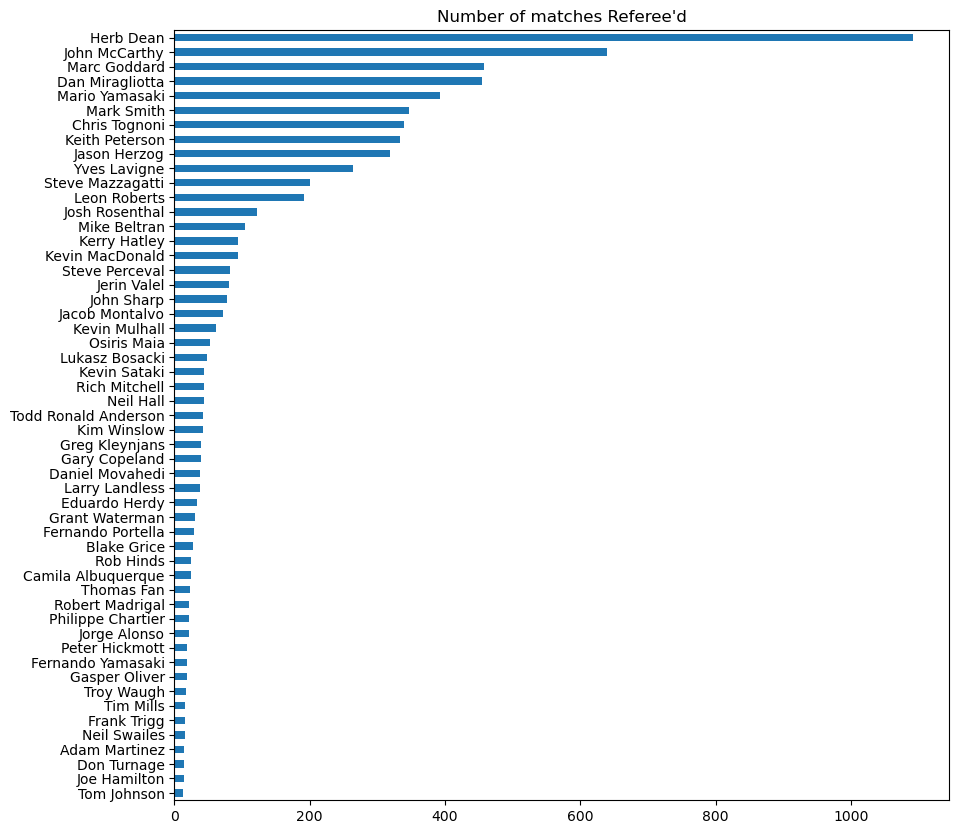

In [6]:
ref_counts = df['Referee'].value_counts()
# cut-off at 75 percent quantile for graphical convenience
ref_counts = ref_counts[ref_counts > ref_counts.quantile(.75)][::-1]
ref_counts.plot(kind='barh', figsize=(10, 10), title="Number of matches Referee'd")

We see that Herb Dean, an active UFC referee, has called over a thousand fights. This may become important later on, if we conclude that Dean's calls lead to imbalance and/or dependence. Next, let us look at the ref counts conditioned on specific weight classes. According to [WSN](https://www.wsn.com/ufc/weight-classes/), there are currently 12 weight classes, 8 belonging to the men's division, and 4 belonging to the women's division. However, the 4 women divisions are less stable compared to the men divisions, meaning that the UFC management is more easily inclined to pull the plug on a female division if it does not bring in enough revenue.  

Since the dataset contains historical data, there is also the [open weight](https://en.wikipedia.org/wiki/Openweight) class, which is not used anymore. In addition, there is the [catch weight](https://en.wikipedia.org/wiki/Catchweight) class, which is used as the weight class that does not adhere to the traditional limits of the other weight classes. For example, when fighters are unable to make the weight, they can agree upon a catch weight, so that the event can still continue. 

In [36]:
weight_classes = df['weight_class'].unique()
sorted(weight_classes)

['Bantamweight',
 'CatchWeight',
 'Featherweight',
 'Flyweight',
 'Heavyweight',
 'LightHeavyweight',
 'Lightweight',
 'Middleweight',
 'OpenWeight',
 'Welterweight',
 'WomenBantamweight',
 'WomenFeatherweight',
 'WomenFlyweight',
 'WomenStrawweight']

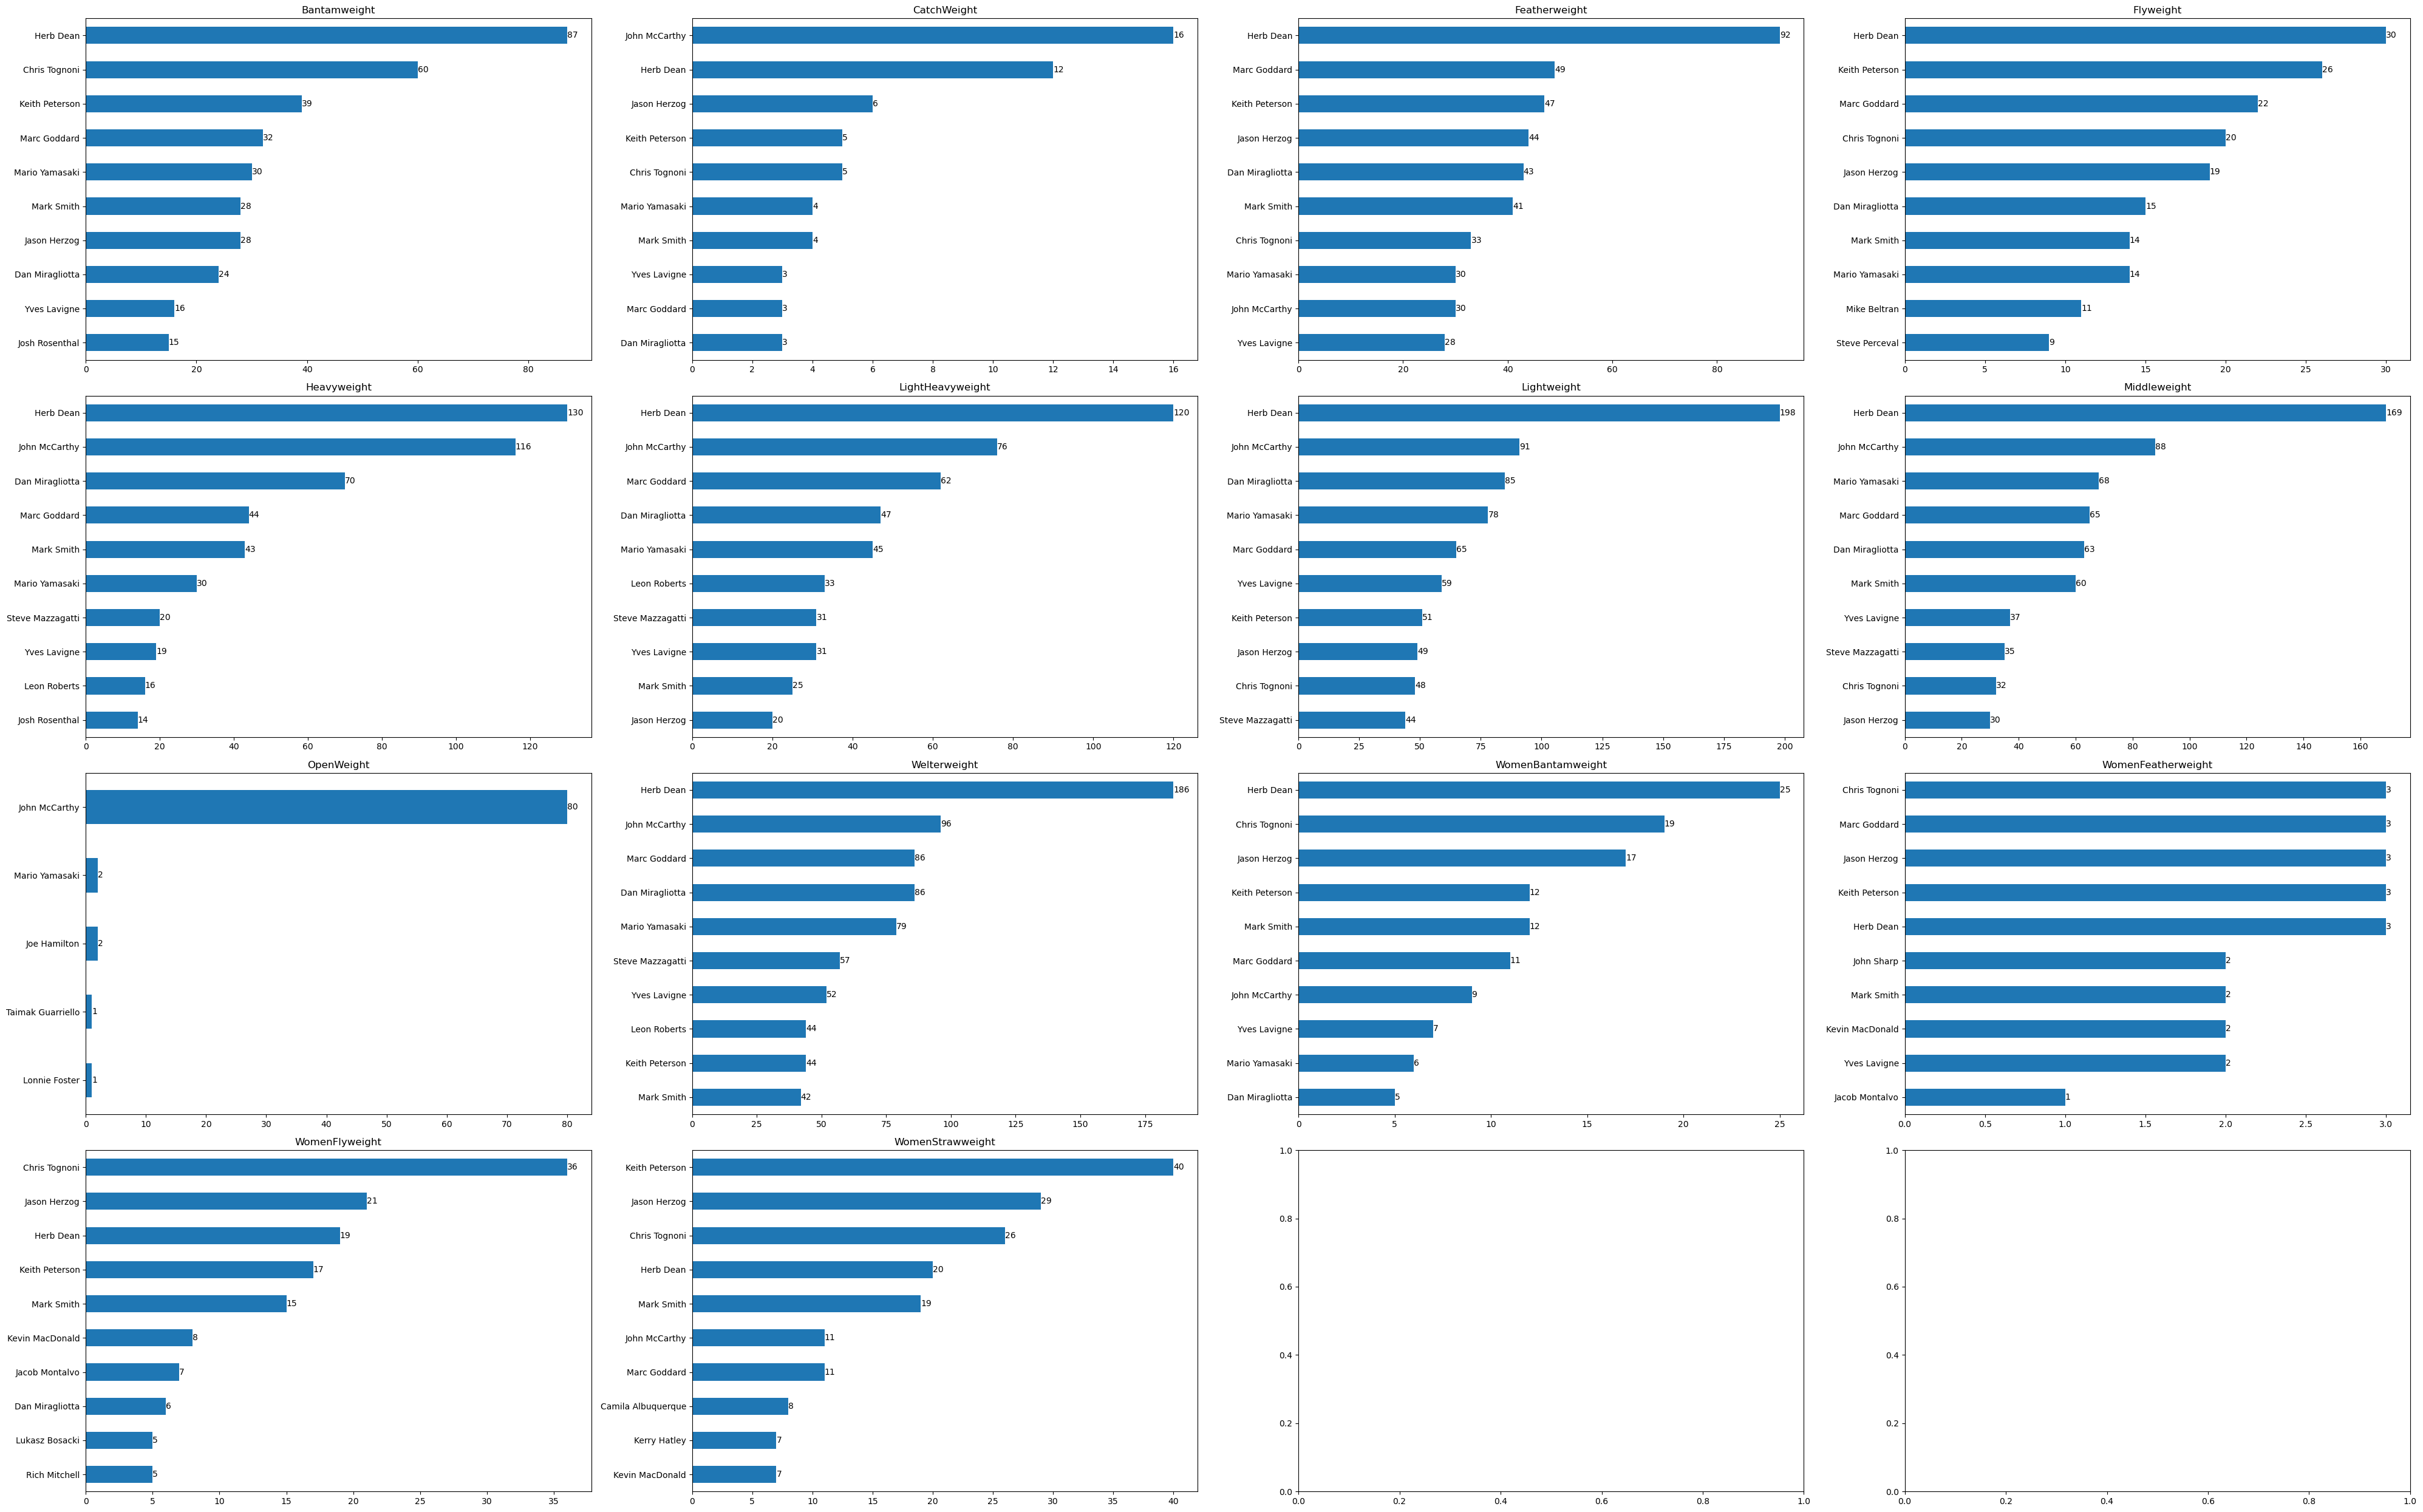

In [37]:
fig, axes = plt.subplots(4, 4, figsize=(40, 25))
axes = axes.flatten()

for ax, wc in zip(axes, sorted(weight_classes)):
    ref_counts = df[df['weight_class'] == wc]['Referee'].value_counts()
    # To simplify the visualisations, we take the top 10 refs
    ref_counts = ref_counts[:10]
    ax = ref_counts[::-1].plot(kind='barh', title=wc, ax=ax)
    ax.bar_label(ax.containers[0])

plt.tight_layout()

Another important insight is looking at the ref counts conditioned on title bouts. Title bouts are often the subject of discussion in the MMA community due to the "bad" referee calls or upsets in the conclusion of the bout. 

In [22]:
df['title_bout'].value_counts()

False    7007
True      417
Name: title_bout, dtype: int64

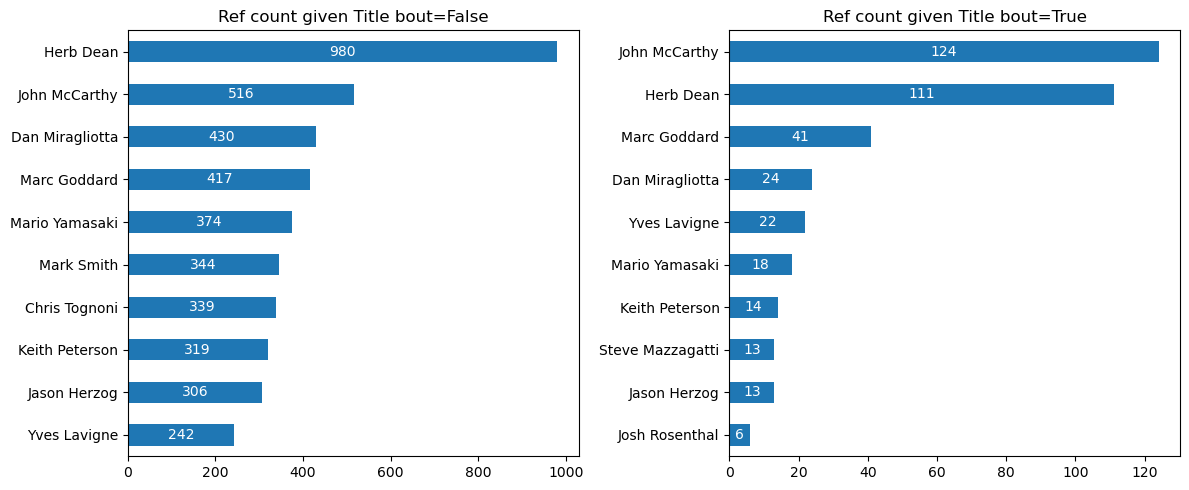

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, cond in zip(axes, [False, True]):
    ref_counts = df[df['title_bout'] == cond]['Referee'].value_counts()
    ref_counts = ref_counts[:10]
    ax = ref_counts[::-1].plot(kind='barh', title=f"Ref count given Title bout={cond}", ax=ax)
    ax.bar_label(ax.containers[0], label_type='center', color='white')


plt.tight_layout()

Interestingly, John McCarthy called slightly more title bouts than the highly experienced Herb Dean, whereas Herb Dean called almost double the amount of non-title bouts compared to John McCarthy. 

### 2.2. Distribution of UFC events over time

We can plot the distributions of UFC events over the time span of 1994-2023.

<AxesSubplot: xlabel='date', ylabel='count'>

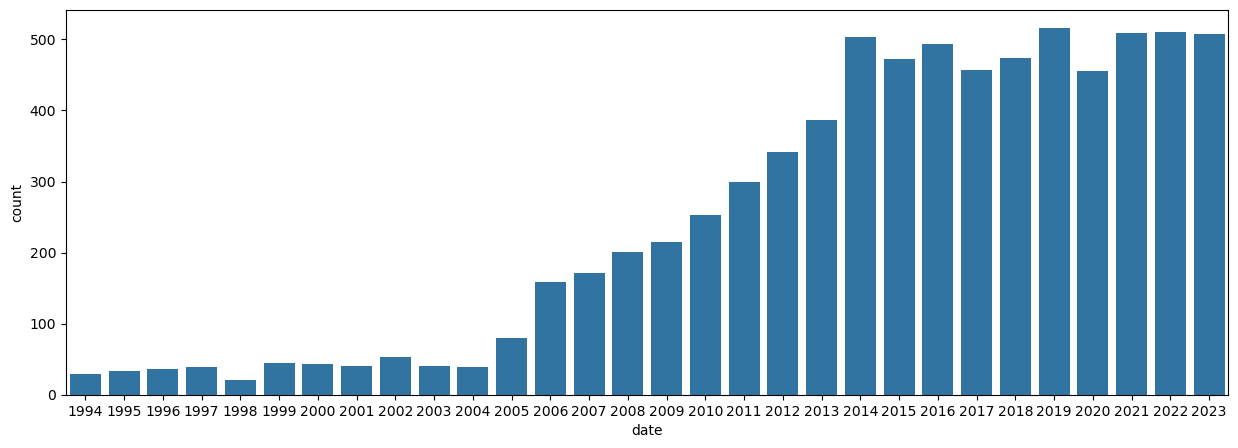

In [263]:
plt.figure(figsize=(15, 5))
dates_year = df['date'].apply(lambda x: x.split('-')[0])[::-1]
sns.countplot(x=dates_year, color='C0')

The above plot indicates an increase in frequency of UFC events over the years, starting in 2004, from which it is clear that the sport has grown in popularity over the years. Furthermore, notice the slight drop of events in 2020, which can be attributed to the adjustment period of the COVID regulations around the world. 

For the purpose of prediction, it is important to note that the sport of MMA is relatively young (compared to other commercialised martial arts, e.g., boxing), and therefore, not only is the sport growing in popularity, but also the skill level of the fighters is growing. In other words, the fight statistics of someone in 1997 may not yield the same **predictive power** as the statistics of someone in 2017 (due to changing strategies, martial arts, diets, professionalism, etc.). We will explore these differences as well.

### 2.3. Distribution of geographic locations

The `location` column contains comma-separated entries of locations in the form of [city, state, country]. 

In [57]:
df['location']

0       Las Vegas, Nevada, USA
1       Las Vegas, Nevada, USA
2       Las Vegas, Nevada, USA
3       Las Vegas, Nevada, USA
4       Las Vegas, Nevada, USA
                 ...          
7419     Denver, Colorado, USA
7420     Denver, Colorado, USA
7421     Denver, Colorado, USA
7422     Denver, Colorado, USA
7423     Denver, Colorado, USA
Name: location, Length: 7424, dtype: object

However, there are entries that are exceptions to this rule, that is, the dataset does not specify the 3-tier structure of information. For example, `[San Juan, Puerto Rico]`. These are set to NaN. 

In [58]:
loc_list = df['location'].apply(lambda x: np.array([xi.strip(' ') for xi in x.split(',')]))
col_names = ['city', 'state', 'country']

# some locations are not defined by [city, state, country] and must be set to NaN
for i in loc_list.index:
    if len(loc_list[i]) < 3:
        loc_list[i] = np.insert(loc_list[i], 0, 'nan') # setting this to np.nan doesn't work due to next conversion

loc_df = pd.DataFrame(np.column_stack([loc_list.tolist()]), columns=col_names)
loc_df = loc_df.replace('nan', np.nan)
loc_df.isna().sum()

city       538
state        0
country      0
dtype: int64

We can visualize the distribution of fights conditioned on country and also conditioned on the states of the country with the most fights, i.e., USA.

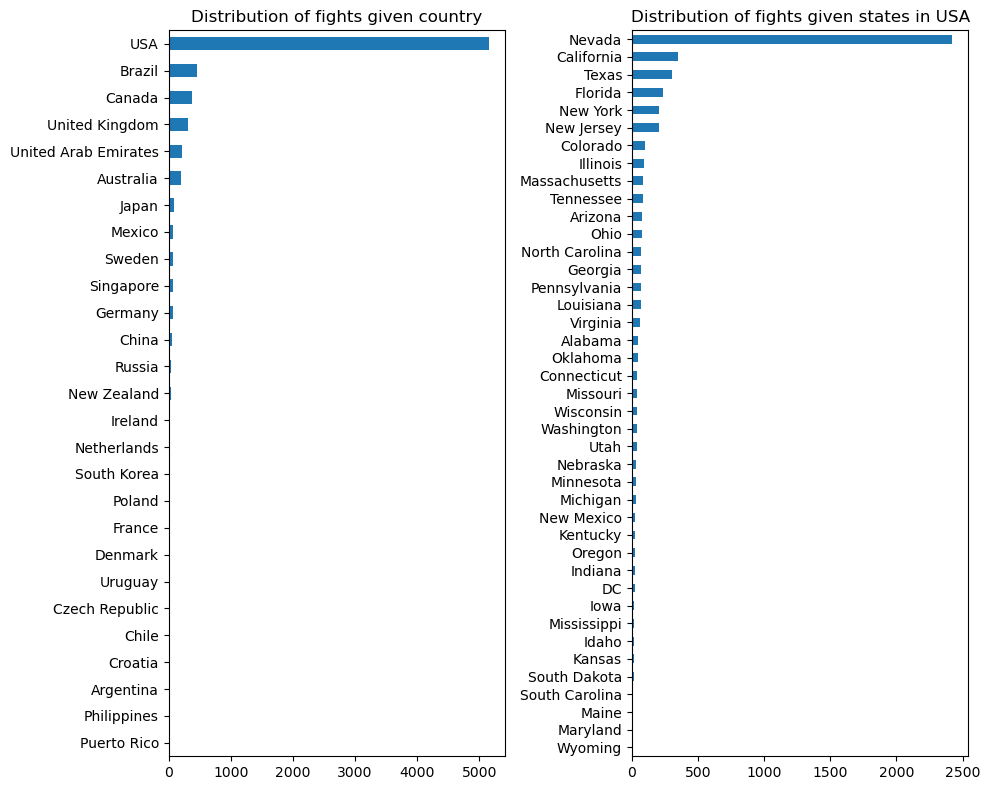

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

country_counts = loc_df['country'].value_counts()
country_counts[::-1].plot(kind='barh', title='Distribution of fights given country', ax=axes[0])

USA_counts = loc_df[loc_df['country'] == 'USA']['state'].value_counts()
USA_counts[::-1].plot(kind='barh', title='Distribution of fights given states in USA', ax=axes[1])
fig.tight_layout()

It seems that Nevada, USA, specifically Las Vegas, is an important location to host UFC events. 

### 2.4. Distribution of Winners

The dataset contains, for each record, an account of the result of the match. In other words, the target variable indicating whether the 'Red corner' won or the 'Blue corner' won. Starting with the distribution of red/blue wins we get the following.

[Text(0, 0, '2503'), Text(0, 0, '4780'), Text(0, 0, '139')]

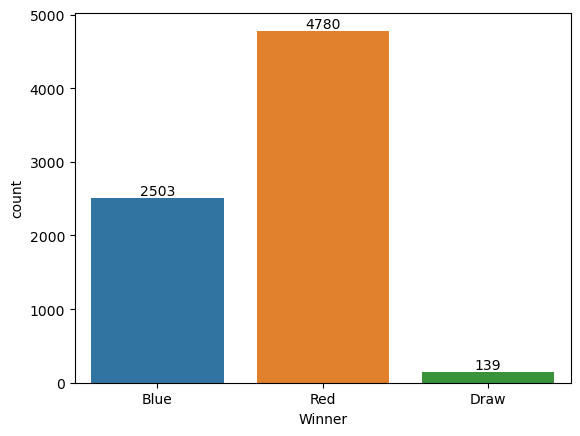

In [129]:
ax = sns.countplot(df, x='Winner')
ax.bar_label(ax.containers[0])

This may seem very surprising, without some context on the way the dataset was aggregated. First of all, the red/blue corner is **not** an arbitrary chosen label for the fighters. Rather, the color of the corner represents who is the **underdog** and who is the **favoured** to win.
- **Red corner**: favourite
- **Blue corner**: underdog

Second of all, a further analysis on the winner distribution over **time** indicates a different reason for the imbalance.

Text(0.5, 1.0, 'Win distribution over time')

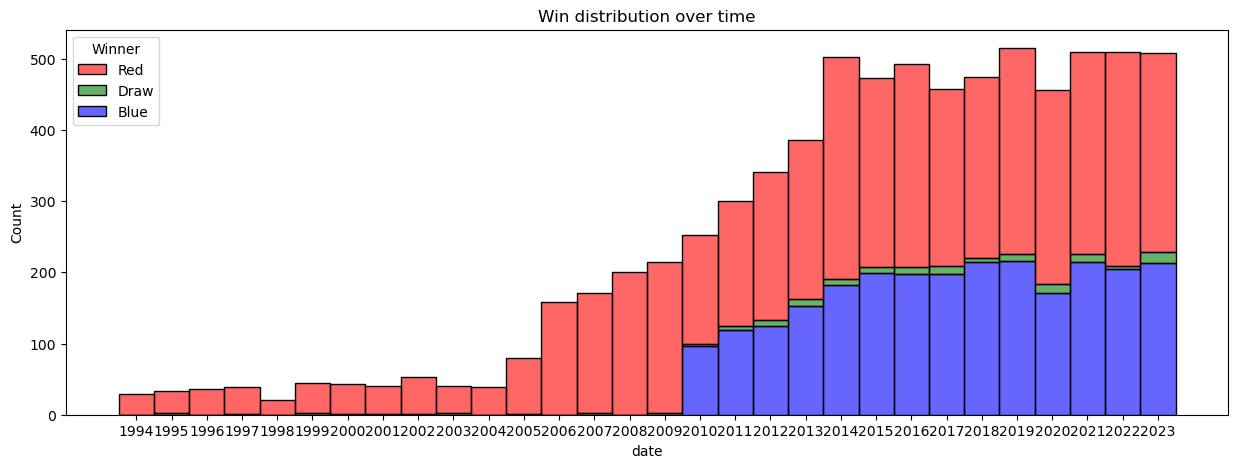

In [278]:
plt.figure(figsize=(15, 5))

df_ = df['date'].apply(lambda x: x.split('-')[0]).to_frame().join(df['Winner'].to_frame())[::-1]

ax = sns.histplot(df_, x='date', hue='Winner', multiple="stack", palette=['r', 'g', 'b'], alpha=0.6)
ax.set_title("Win distribution over time")

We can assume that prior to approximately 2010, the UFC stats website reported on wins by marking the winning fighter as the red corner fighter. This explains the imbalance on the `Winner` distribution. Therefore, a possible data cleaning step is to re-assign the red/blue corner labels for the instances prior to 2009, based on who the underdog/favourite was. For now, we can make the simplifying assumption to quantify the imbalance by only looking at records after the blue corner started winning. 

In [226]:
first_blue_win = (df['Winner'] == 'Blue')[::-1].idxmax()
df_approx_balanced = df.iloc[:first_blue_win+1, :]
first_blue_win_date = df.iloc[first_blue_win]['date']
print(f"Approximate balanced dataset has shape: {df_approx_balanced.shape}")
print(f"First instance where blue won on: {first_blue_win_date}")

Approximate balanced dataset has shape: (6139, 144)
First instance where blue won on: 2010-03-21


A general method to measure the imbalance of the data is via the **Shannon entropy** measure. Formally, Shannon entropy is a measure of uncertainty (or variability) associated with random variables. Given $N$ instances, $k$ classes of size $N_i$, entropy is computed as follows:
$$
    H = -\sum_{i=1}^k \dfrac{N_i}{N} \log \dfrac{N_i}{N}
$$
Where:
- $H = 0$ if there is 1 class, i.e., dataset is very unbalanced.
- $H = \log k$ when all classes are balanced, each with the same size $N/k$.

Thus, we can normalise the measure by dividing $H$ by $\log k$ to get a measure between 0 and 1. Note that the normalisation has the pleasant side-effect that the formula becomes invariant to the logarithm base. 
$$
    \text{Balance} = \dfrac{H}{\log k}
$$
Where Balance $\in [0, 1]$, and 0 balance means unbalance, whereas 1 balance corresponds to full class balance.

In [230]:
def balance(df: pd.DataFrame, col: str):
    counts = df[col].value_counts()
    k = counts.shape[0]
    if k < 2: 
        print(f"Warning: found one class k = 1, which is always fully balanced")
        return 1 
    N = df.shape[0]
    return -np.sum(counts/N * np.log(counts/N)) / np.log(k)

print(f"Balance from {first_blue_win_date} onwards: {balance(df_approx_balanced, 'Winner')}")
print(f"Total dataset balance:           {balance(df, 'Winner')}")

Balance from 2010-03-21 onwards: 0.6951549198333558
Total dataset balance:           0.6594820218453336


We can also look at the class balance of `Winner` conditioned on `weight_class` for both the entire dataset as well as the limited dataset that approximates balance.

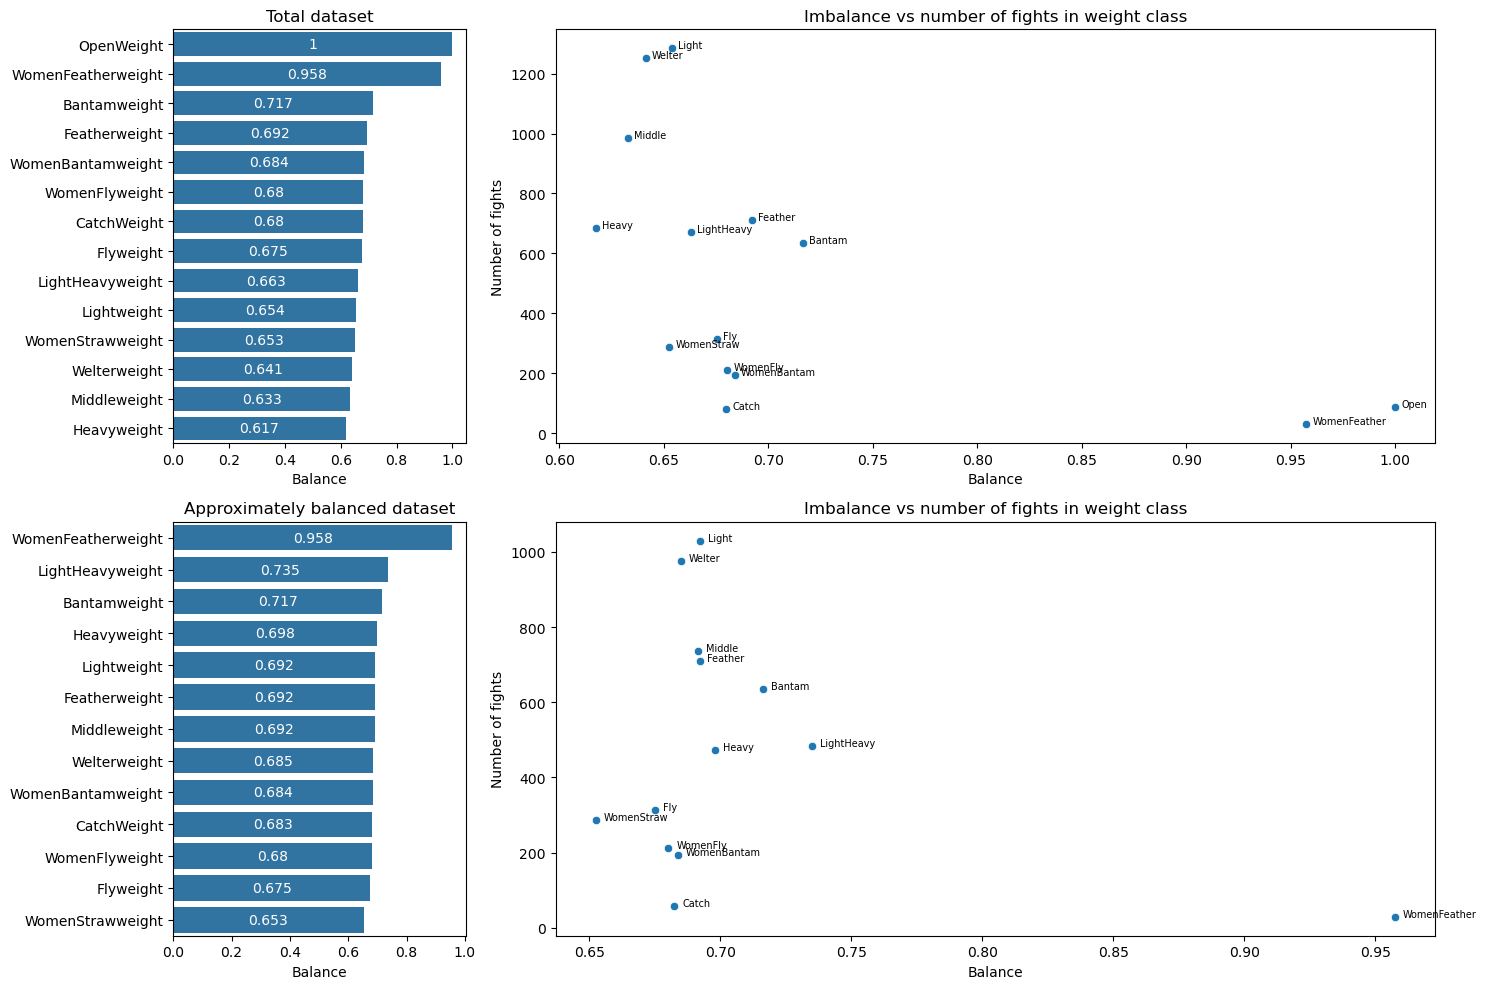

In [234]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 3]})

# total dataset
weight_classes = df['weight_class'].unique()
balance_wc = np.array([
    balance(df[df['weight_class'] == wc], 'Winner') 
    for wc in weight_classes
])
sort_indices = np.argsort(balance_wc)[::-1]
balance_wc = balance_wc[sort_indices]
weight_classes = weight_classes[sort_indices]

sns.barplot(x=balance_wc, y=weight_classes, color='C0', ax=axes[0, 0])
axes[0, 0].bar_label(axes[0, 0].containers[0], fmt='%.3g', label_type='center', color='white')
axes[0, 0].set_title("Total dataset")
axes[0, 0].set_xlabel("Balance")

p_wc = df['weight_class'].value_counts()
p_wc = p_wc[weight_classes]
sns.scatterplot(x=balance_wc, y=p_wc, ax=axes[0, 1])
axes[0, 1].set_xlabel("Balance")
axes[0, 1].set_ylabel("Number of fights")
axes[0, 1].set_title("Imbalance vs number of fights in weight class")
for i, wc in enumerate(weight_classes):
    axes[0, 1].annotate(wc[:-6], (balance_wc[i]+.003, p_wc[i]), fontsize=7)

# approximately balanced dataset
weight_classes = df_approx_balanced['weight_class'].unique()
balance_wc = np.array([
    balance(df_approx_balanced[df_approx_balanced['weight_class'] == wc], 'Winner') 
    for wc in weight_classes
])
sort_indices = np.argsort(balance_wc)[::-1]
balance_wc = balance_wc[sort_indices]
weight_classes = weight_classes[sort_indices]

sns.barplot(x=balance_wc, y=weight_classes, color='C0', ax=axes[1, 0])
axes[1, 0].bar_label(axes[1, 0].containers[0], fmt='%.3g', label_type='center', color='white')
axes[1, 0].set_title("Approximately balanced dataset")
axes[1, 0].set_xlabel("Balance")

p_wc = df_approx_balanced['weight_class'].value_counts()
p_wc = p_wc[weight_classes]
sns.scatterplot(x=balance_wc, y=p_wc, ax=axes[1, 1])
axes[1, 1].set_xlabel("Balance")
axes[1, 1].set_ylabel("Number of fights")
axes[1, 1].set_title("Imbalance vs number of fights in weight class")
for i, wc in enumerate(weight_classes):
    axes[1, 1].annotate(wc[:-6], (balance_wc[i]+.003, p_wc[i]), fontsize=7)

plt.tight_layout()

The interesting findings in the above analysis are the following. 
1. It seems that the approximately more balanced dataset, from the moment that blue corner wins were introduced is on average and on the level of weight class groups, more balanced, compared to the total dataset. 
2. Notice that the open weight class is not included in the approximately balanced metrics, due to it not existing anymore in 2010. 
3. We can see that the imbalancedness with respect to `Winner` is approximately equal to the imbalancedness of the `Winner` given `weight_class`. The outliers are the open and women featherweight divisions, but as can be seen in the right subplot, their proportion of the total fights is relatively small, and thus, these contribute little to the overal imbalance.

## 3. Exploring fight features

Besides the generic features, there are 69 features dedicated to each of the red/blue fighter. Each individual fight details a historic summary for each fighter (using 69 features), and the `Winner` feature that says what the conclusion was of that fight. The idea is to predict `Winner` based on $2 \times 69$ features, i.e., 69 blue statistics and 69 red statistics. 

Each set of 69 features is further subdivided in **average fight statistics** of one of the fighters (red/blue) over their whole career at the UFC, and some more **generic information** about the fighter, e.g., height, weight, age, etc. The average fight statistics of the red/blue fighter include features about the fighter's striking, grappling, submission, and control abilities. More specifically, included statistics are about knockdowns, significant strikes, takedowns, submission attempts, reversals (i.e., fighter in a top position on the ground gets reversed and lies on the bottom position instead), and control time on the ground. For each of these, there are also features about the damage done by the opponent on the fighter, denoted with the infix `_opp_`. 

In [52]:
avg_cols = [c for c in red_cols if 'avg' in c]
generic_cols = [c for c in red_cols if 'avg' not in c]

print(f"Features denoting 'averages':            {len(avg_cols)}")
print(f"Features denoting 'generic information': {len(generic_cols)}")
print(f"Total features: 'averages' + 'generic' = {len(avg_cols) + len(generic_cols)}")

Features denoting 'averages':            48
Features denoting 'generic information': 21
Total features: 'averages' + 'generic' = 69


### 3.1. Fight statistics

The following table describes the fight statistic features.

| **Fight Feature** | **Description** |
|--|--|
| `avg_KD` | Average number of knockdowns |
| `avg_SIG_STR_att` | Average number of significant strikes attempted |
| `avg_SIG_STR_landed` | Average number of significant strikes landed |
| `avg_SIG_STR_pct` | Average significant strikes percentage |
| `avg_TOTAL_STR_att` | Average number of total strikes attempted (includes significant strikes and small/short strikes in the clinch and on the ground) |
| `avg_TOTAL_STR_landed` | Average number of total strikes landed (includes significant strikes and small/short strikes in the clinch and on the ground) |
| `avg_HEAD_att` | Average number of strikes attempted on opponent's head |
| `avg_HEAD_landed` | Average number of strikes landed on opponent's head |
| `avg_BODY_att` | Average number of strikes attempted on opponent's body |
| `avg_BODY_landed` | Average number of strikes landed on opponent's head |
| `avg_LEG_att` | Average number of strikes attempted on opponent's legs |
| `avg_LEG_landed` | Average number of strikes landed on opponent's head |
| `avg_DISTANCE_att` | Average number of strikes attempted from a distance |
| `avg_DISTANCE_landed` | Average number of strikes landed from a distance |
| `avg_CLINCH_att` | Average number of strikes attempted in the clinch position |
| `avg_CLINCH_landed` | Average number of strikes landed in the clinch position |
| `avg_GROUND_att` | Average number of strikes attempted on the ground  |
| `avg_GROUND_landed` | Average number of strikes landed on the ground |
| `avg_TD_pct` | Average takedown percentage |
| `avg_TD_att` | Average number of takedowns attempted |
| `avg_TD_landed` | Average number of takedowns landed |
| `avg_SUB_ATT` | Average number of submission attempts |
| `avg_REV` | Average number of reversals |
| `avg_CTRL_time(seconds)` | Average number of seconds on top position where opponent is on the ground |

For example, for the red fighter (prefixed by `R_`), the feature `avg_SIG_STR_landed` describes the average number of significant strikes landed based on all previous fights that the red fighter has had. Similarly, `avg_opp_SIG_STR_landed` describe the same feature, i.e., `SIG_STR_landed`, except that it describes the average number of significant strikes landed from all previous opponents that the red fighter has faced. In other words, the average significant strikes landed **on** the red fighter from his/her opponents. 

In [55]:
avg_attempted_cols = [c for c in avg_cols if 'att' in c]
avg_landed_cols = [c for c in avg_cols if 'landed' in c]
avg_other_cols =  set(avg_cols) - set(avg_attempted_cols) - set(avg_landed_cols)
print(f"Average 'attempted' damage features: {len(avg_attempted_cols)}")
print(f"Average 'landed' damage features:    {len(avg_landed_cols)}")
print(f"Average 'other' features:            {len(avg_other_cols)}")

Average 'attempted' damage features: 18
Average 'landed' damage features:    18
Average 'other' features:            12


In [125]:
avg_att_cols = [c for c in avg_attempted_cols if '_opp_' not in c]
opp_avg_att_cols = [c for c in avg_attempted_cols if '_opp_' in c]

print(f"Fighter average 'attempted' features: {len(avg_att_cols)}")
print([c[6:-4] for c in avg_att_cols])
print(f"Opponent average 'attempted' features: {len(opp_avg_att_cols)}")
print([c[6:-4] for c in opp_avg_att_cols])

Fighter average 'attempted' features: 9
['SIG_STR', 'TOTAL_STR', 'TD', 'HEAD', 'BODY', 'LEG', 'DISTANCE', 'CLINCH', 'GROUND']
Opponent average 'attempted' features: 9
['opp_SIG_STR', 'opp_TOTAL_STR', 'opp_TD', 'opp_HEAD', 'opp_BODY', 'opp_LEG', 'opp_DISTANCE', 'opp_CLINCH', 'opp_GROUND']


Starting with the 9 average attempted fight actions, we can combine the `R_` and `B_` columns and see how they relate to each other via a pairplot. 

In [355]:
red_avg_att_cols = [c for c in df.columns if c.startswith("R_") and 'avg' in c and 'att' in c and '_opp_' not in c]
blue_avg_att_cols = [c for c in df.columns if c.startswith("R_") and 'avg' in c and 'att' in c and '_opp_' not in c]

total_att_df = {'Winner': pd.concat([df['Winner'], df['Winner']]).reset_index(drop=True)}
for r, b in zip(red_avg_att_cols, blue_avg_att_cols):
    total_att_df[r[2:]] = pd.concat([df[r], df[b]]).reset_index(drop=True)

total_att_df = pd.DataFrame(total_att_df).dropna().reset_index(drop=True)

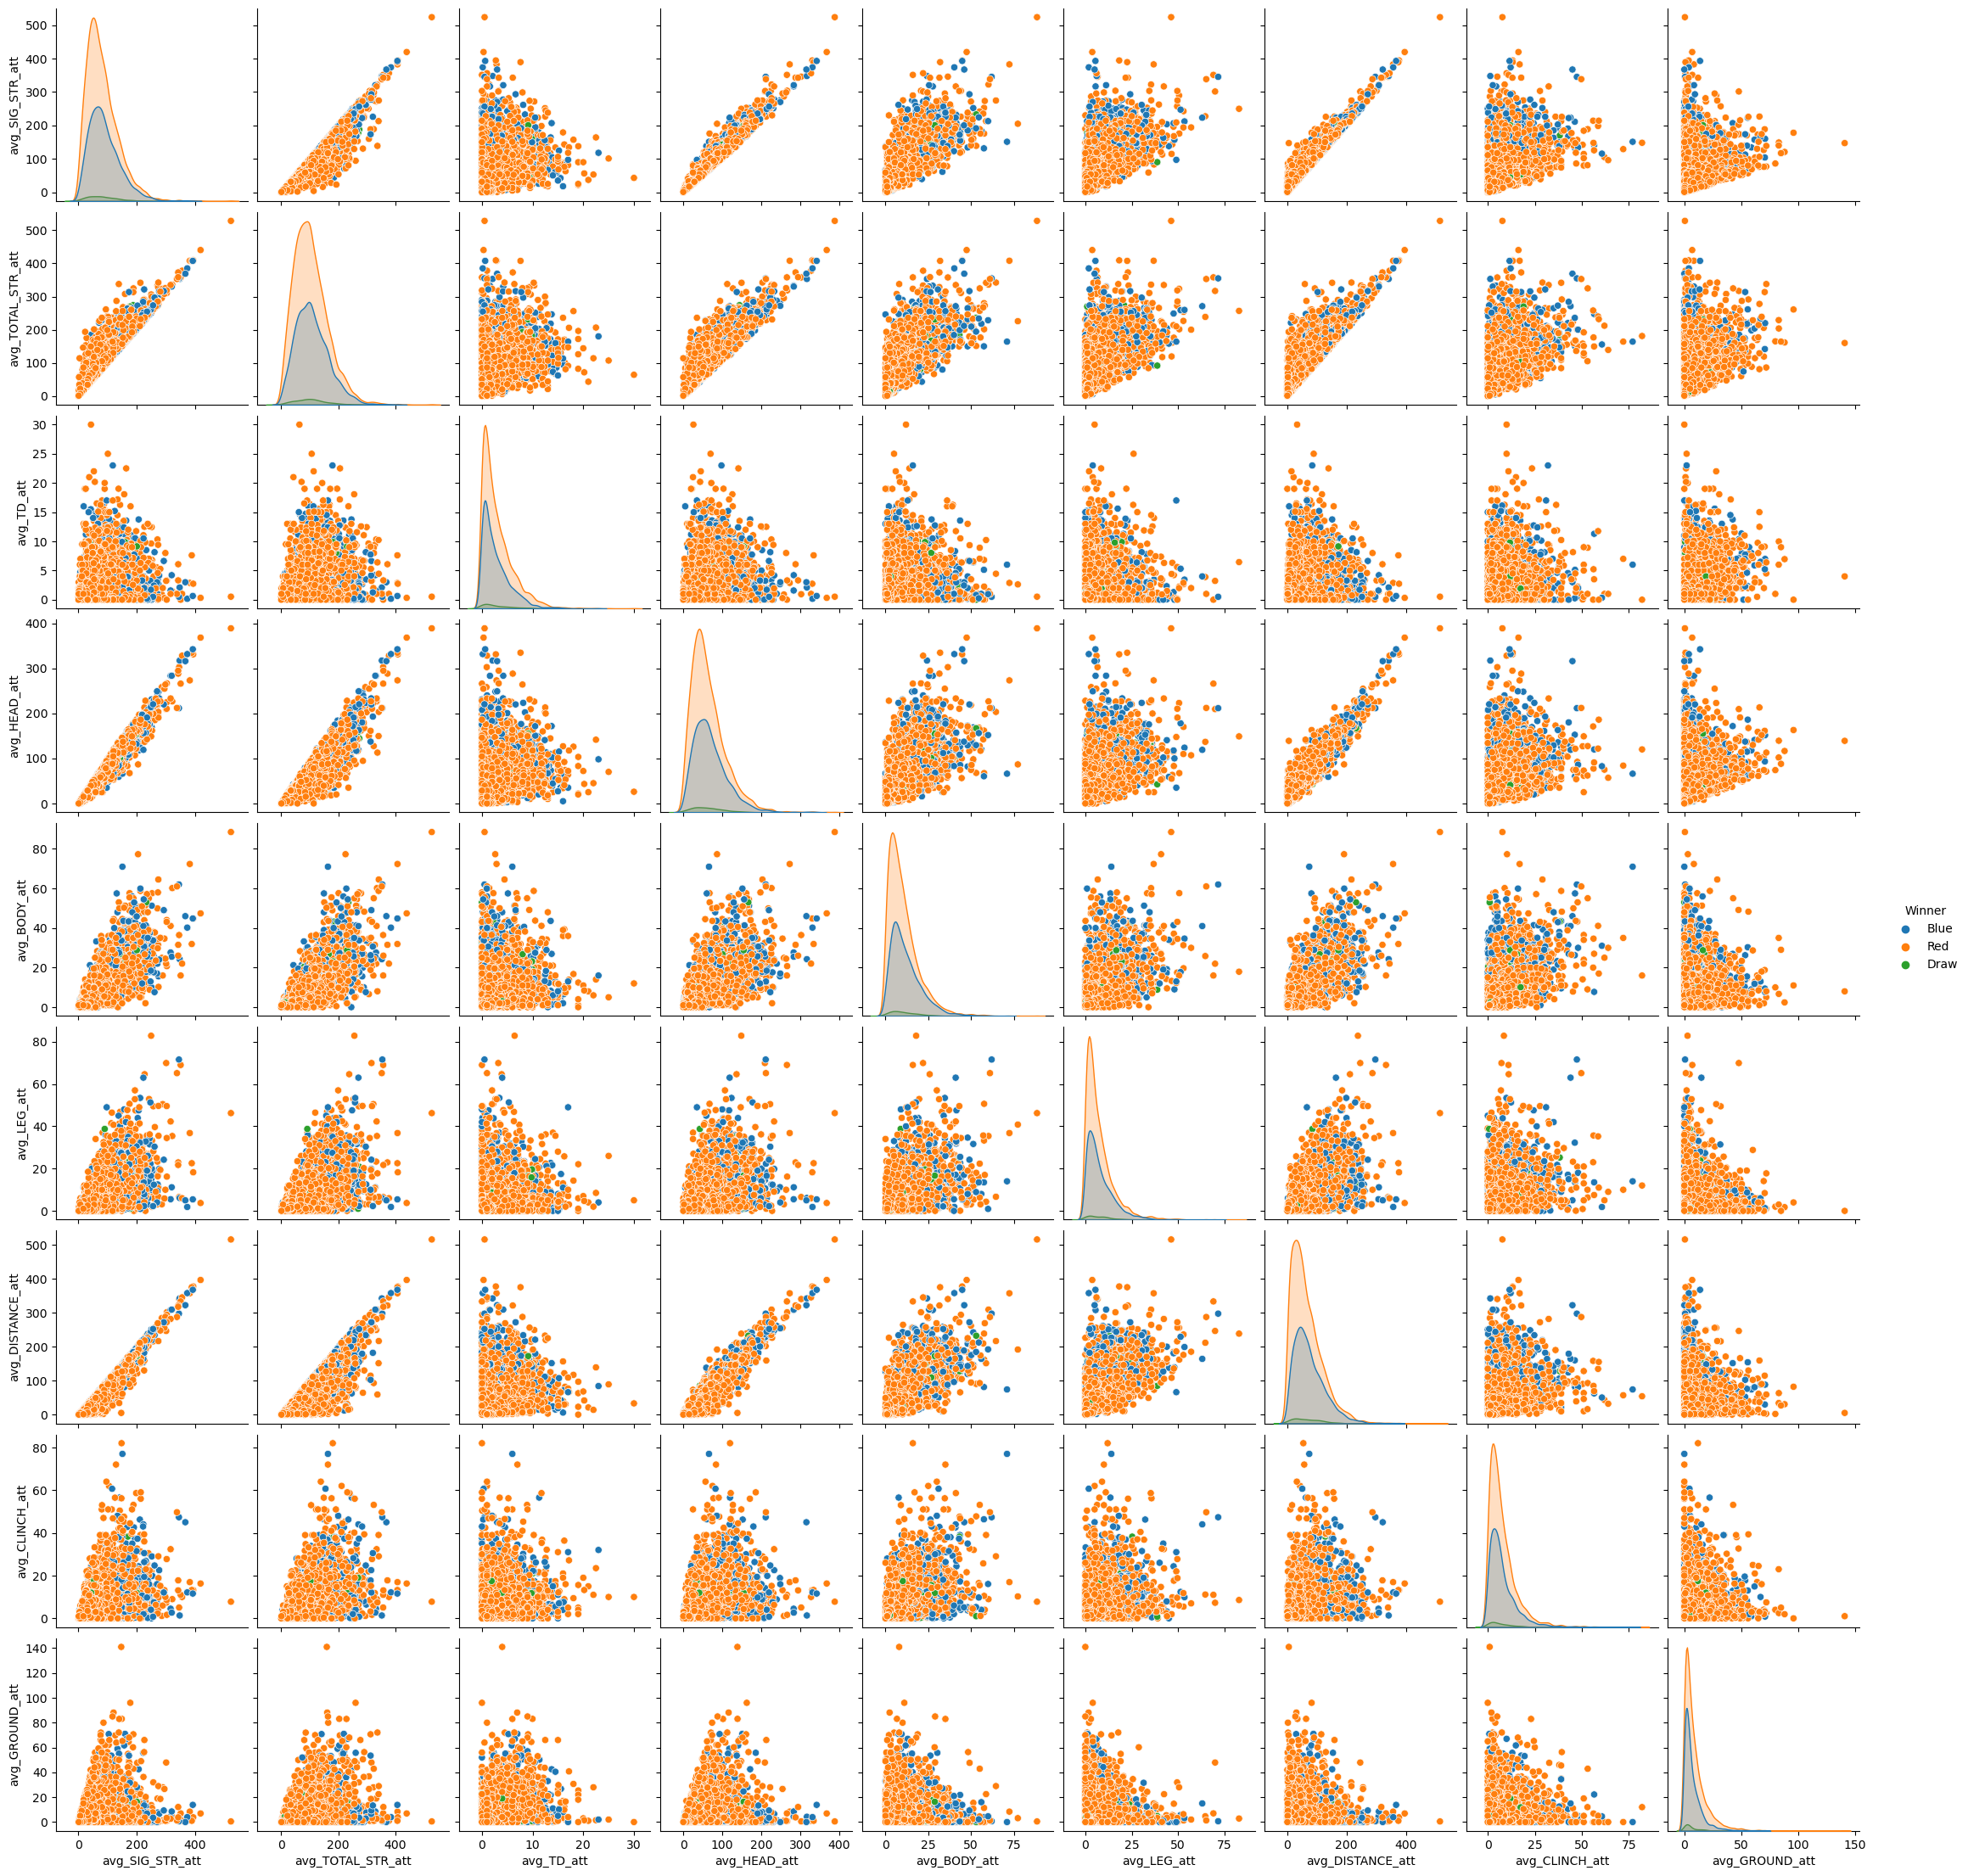

In [357]:
sns.pairplot(total_att_df, hue='Winner')

We can already see some interesting and obvious correlated features. We see that attempted distance strikes are positively correlated with attempted significant strikes, total strikes, and strikes to the head. Often, whenever fighters attempt to do strikes from some distance, they are meant to be significant and therefore, often aimed at the head. This ensures that the somewhat risky move of distance strikes/kicks pays off. Furthermore, it is trivial to entail that significant strikes would indeed be related to the total strikes, since significant strikes are a subset of total strikes. We can also see that strikes to the head are correlated with significant strikes and total strikes. Surprisingly, none of the other features seem to have similarly strong correlation with each other. We can validate this via a correlation matrix heatmap.  

<AxesSubplot: >

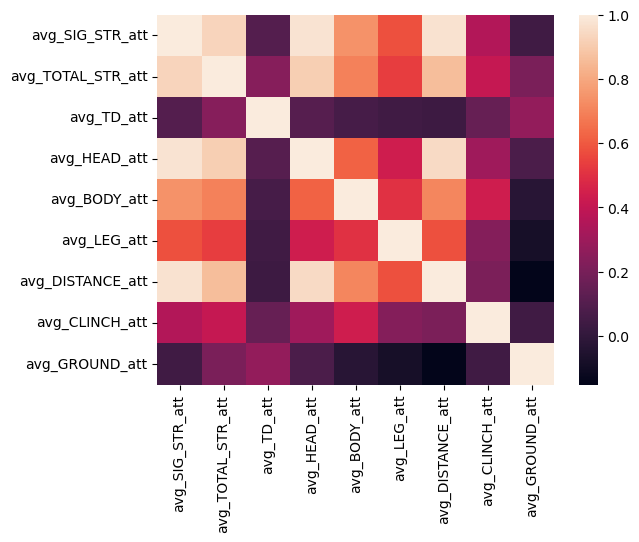

In [359]:
sns.heatmap(total_att_df.iloc[:, 1:].corr())

Similarly, we can analyse the relationship of average fight statistics with respect to 'landed' attempts.

In [365]:
red_avg_landed_cols = [c for c in df.columns if c.startswith("R_") and 'avg' in c and 'landed' in c and '_opp_' not in c]
blue_avg_landed_cols = [c for c in df.columns if c.startswith("R_") and 'avg' in c and 'landed' in c and '_opp_' not in c]

total_landed_df = {'Winner': pd.concat([df['Winner'], df['Winner']]).reset_index(drop=True)}
for r, b in zip(red_avg_landed_cols, blue_avg_landed_cols):
    total_landed_df[r[2:]] = pd.concat([df[r], df[b]]).reset_index(drop=True)

total_landed_df = pd.DataFrame(total_landed_df).dropna().reset_index(drop=True)

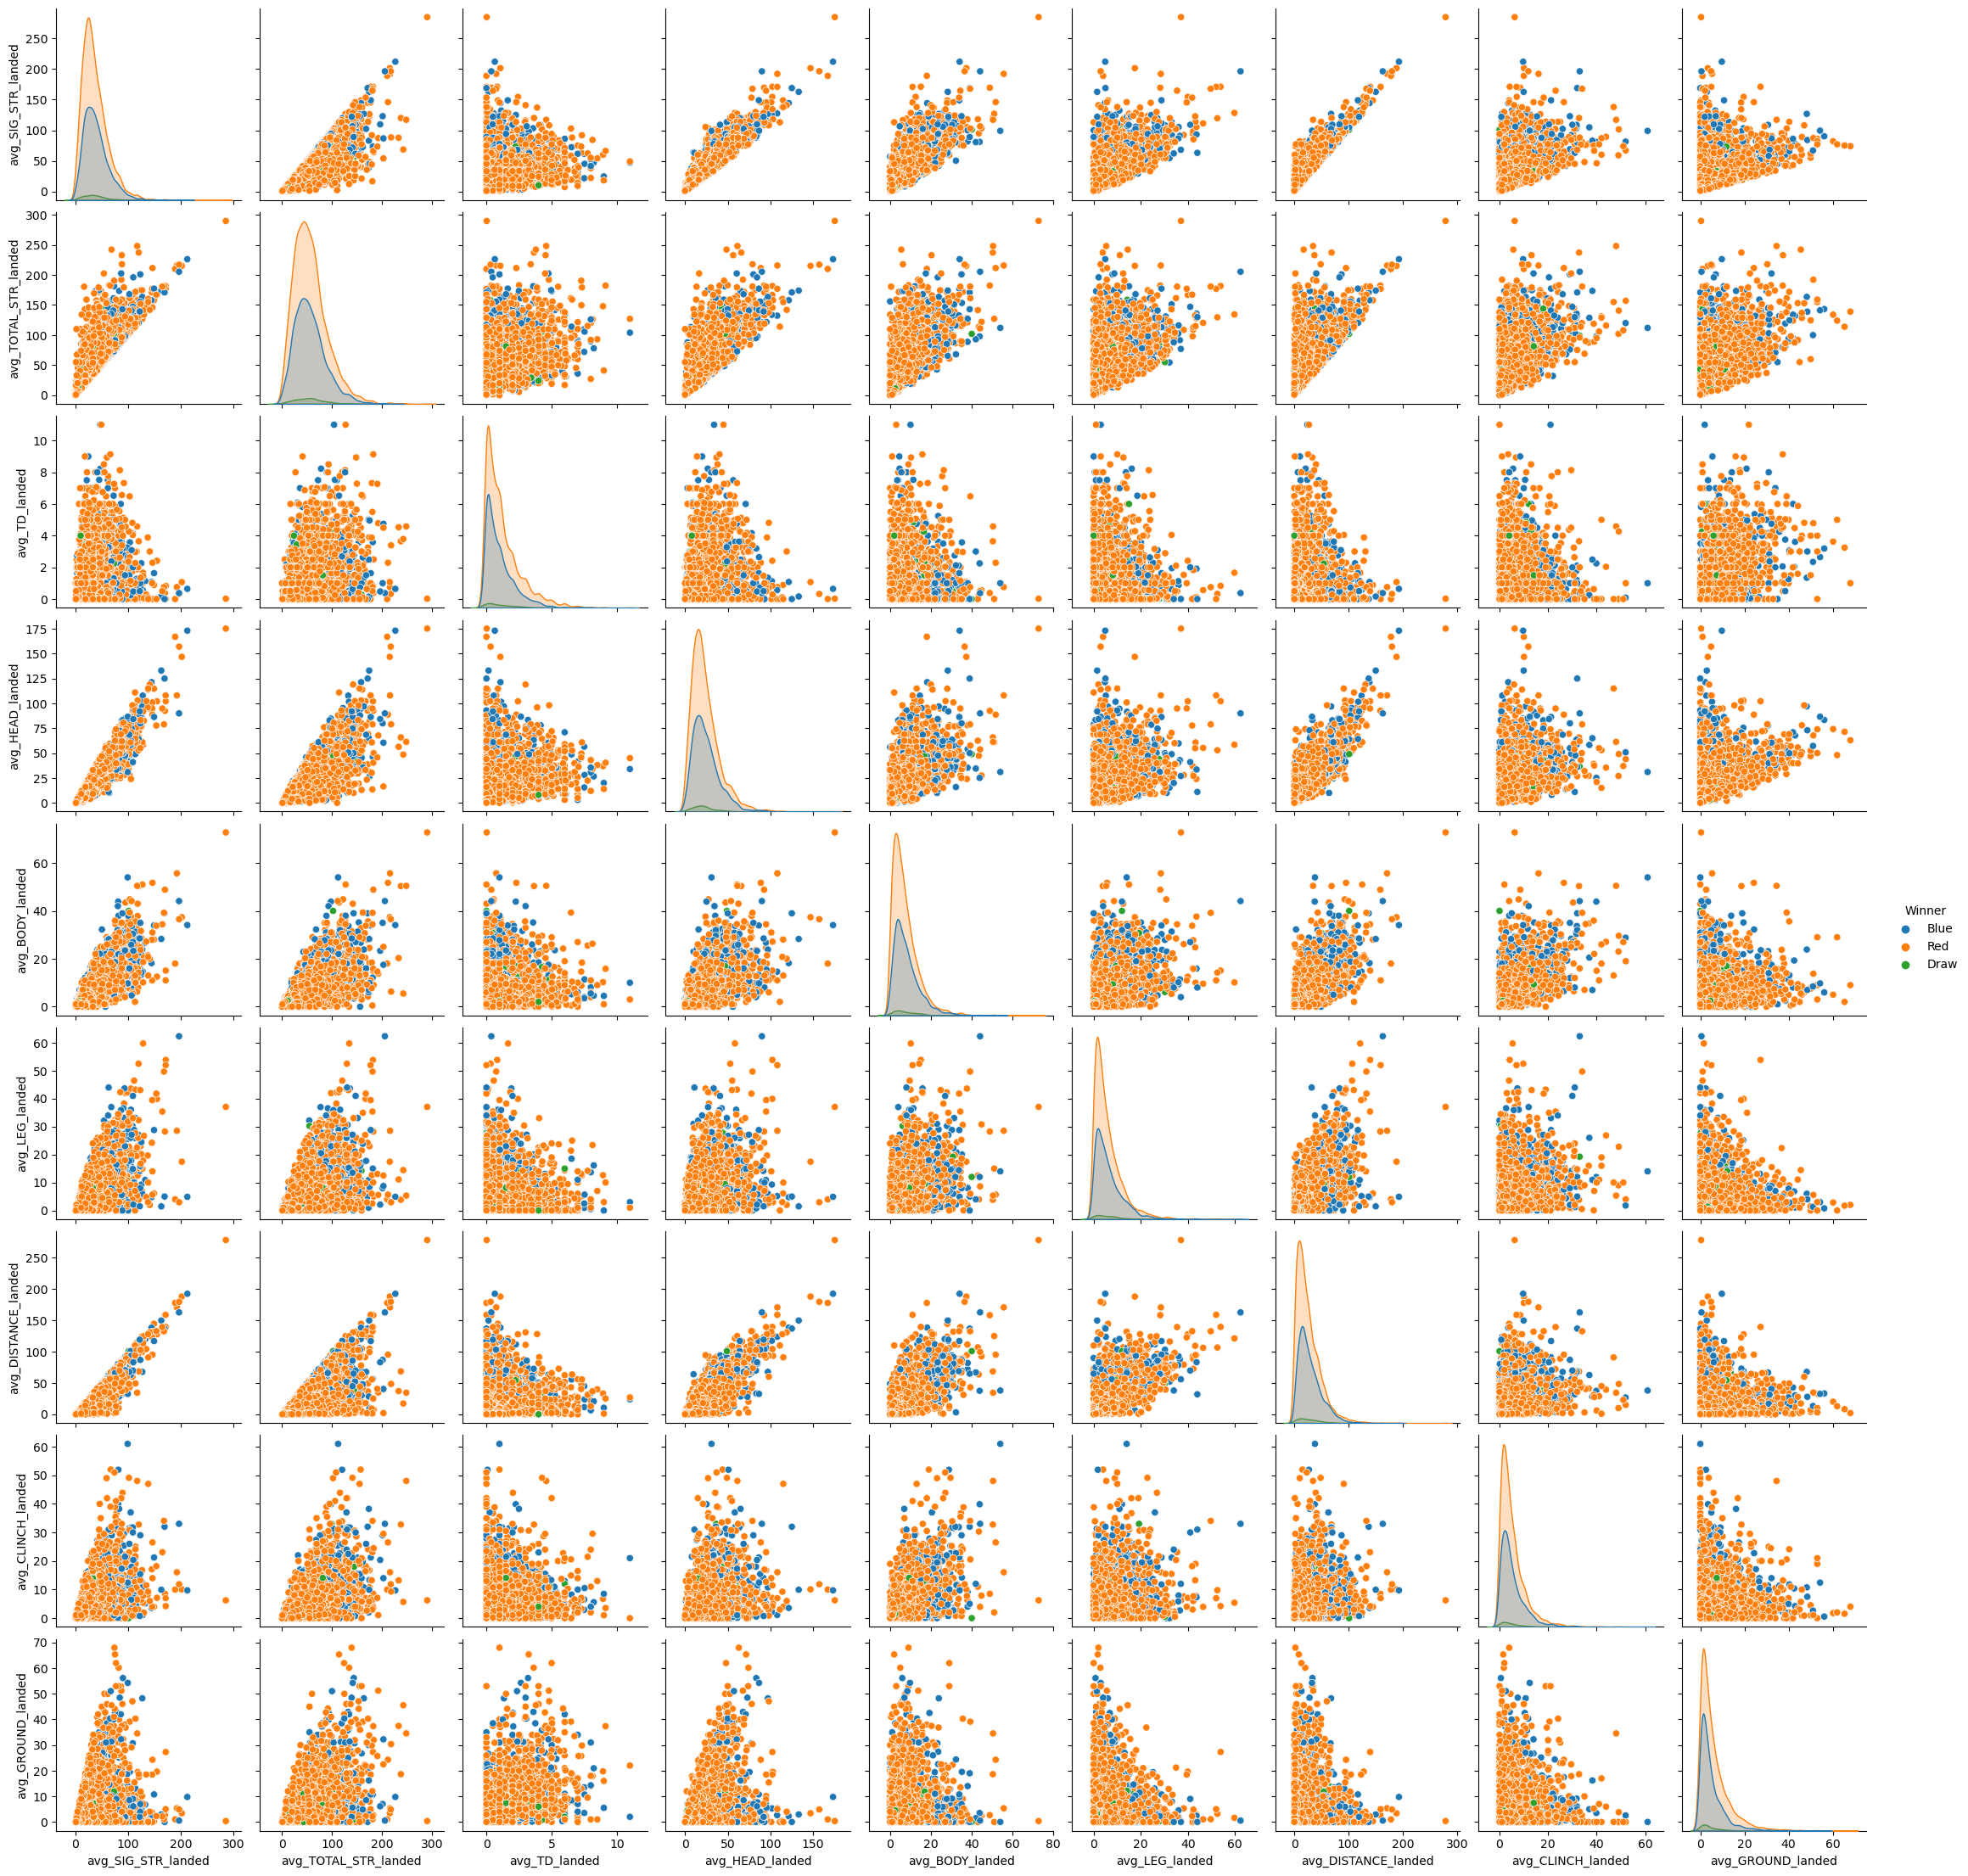

In [366]:
sns.pairplot(total_landed_df, hue='Winner')

<AxesSubplot: >

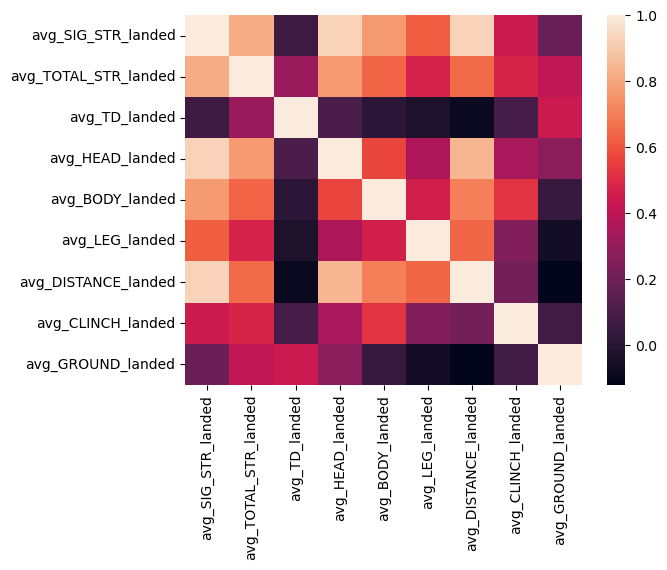

In [386]:
sns.heatmap(total_landed_df.iloc[:, 1:].corr())

We can see that the same conclusions about correlations hold, albeit, less strongly. We can measure the difference between these correlation matrices to see how much they differ.

Text(0.5, 1.05, 'Absolute difference between attempted and landed correlation matrices')

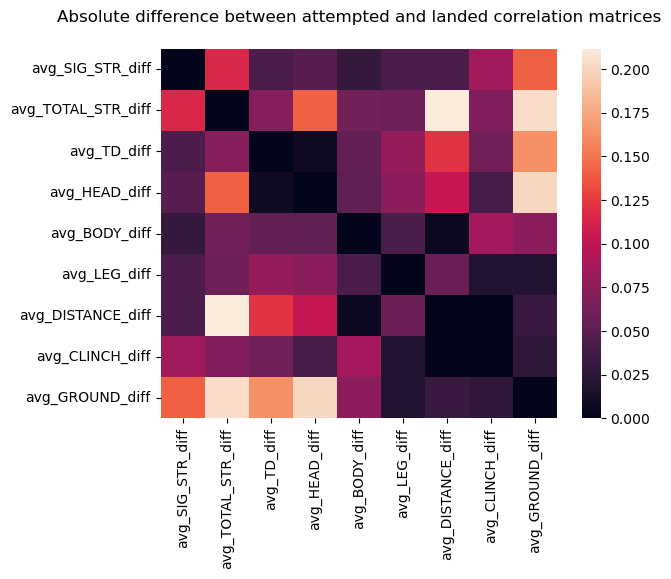

In [403]:
diff_cols = [c[:-4]+"_diff" for c in total_att_df.columns[1:]]
abs_diff_corr = np.abs(total_landed_df.iloc[:, 1:].corr().to_numpy() - total_att_df.iloc[:, 1:].corr().to_numpy())
ax = sns.heatmap(abs_diff_corr, xticklabels=diff_cols, yticklabels=diff_cols)
ax.set_title("Absolute difference between attempted and landed correlation matrices", y=1.05)

Now it becomes clear that there is a relatively large difference between the attempted and landed correlation of distance-based strikes and total strikes. Furthermore, there seems to be a relatively large difference between the attempted and landed correlation of head strikes and ground strikes, which is not too surprising as strikes hit more often when someone is pinned to the ground. 

Next, let us explore the 12 other average fight statistics

In [406]:
avg_other_cols

{'R_avg_CTRL_time(seconds)',
 'R_avg_KD',
 'R_avg_REV',
 'R_avg_SIG_STR_pct',
 'R_avg_SUB_ATT',
 'R_avg_TD_pct',
 'R_avg_opp_CTRL_time(seconds)',
 'R_avg_opp_KD',
 'R_avg_opp_REV',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_opp_SUB_ATT',
 'R_avg_opp_TD_pct'}

<AxesSubplot: xlabel='R_avg_HEAD_att', ylabel='B_avg_HEAD_att'>

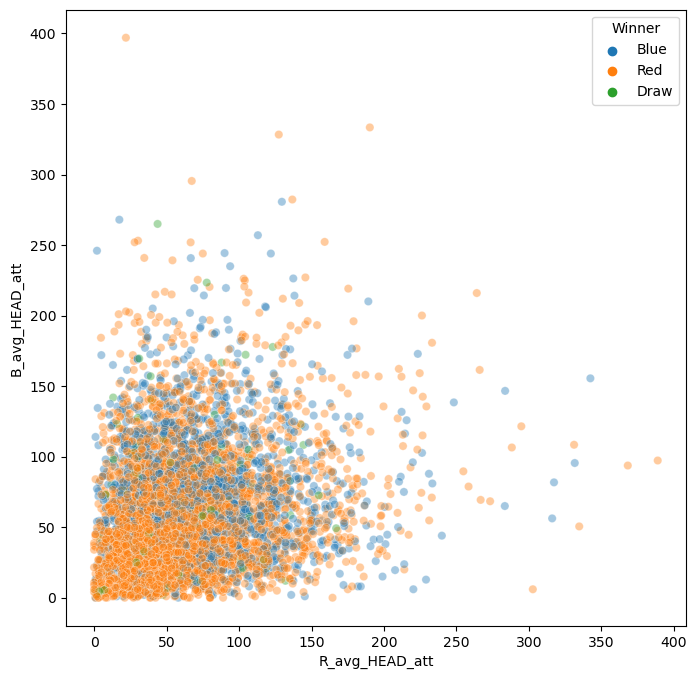

In [315]:
plt.figure(figsize=(8, 8))
sns.scatterplot(df, x='R_avg_HEAD_att', y='B_avg_HEAD_att', hue='Winner', alpha=0.4)

In [33]:
fight_stats = [
    'avg_KD',
    'avg_opp_KD',
    'avg_SIG_STR_pct',
    'avg_TD_pct',
    'avg_SUB_ATT',
    'avg_REV',
    'avg_SIG_STR_att',
    'avg_SIG_STR_landed',
    'avg_TOTAL_STR_att',
    'avg_TOTAL_STR_landed',
    'avg_TD_att',
    'avg_TD_landed',
    'avg_HEAD_att',
    'avg_HEAD_landed',
    'avg_BODY_att',
    'avg_BODY_landed',
    'avg_LEG_att',
    'avg_LEG_landed',
    'avg_DISTANCE_att',
    'avg_DISTANCE_landed',
    'avg_CLINCH_att',
    'avg_CLINCH_landed',
    'avg_GROUND_att',
    'avg_GROUND_landed',
    'avg_CTRL_time(seconds)'
]

In [32]:
'B_avg_KD'
'B_avg_opp_KD'

'B_avg_SIG_STR_pct'
'B_avg_opp_SIG_STR_pct'

'B_avg_TD_pct'
'B_avg_opp_TD_pct'

'B_avg_SUB_ATT'
'B_avg_opp_SUB_ATT'

'B_avg_REV'
'B_avg_opp_REV'

'B_avg_SIG_STR_att'
'B_avg_opp_SIG_STR_att'

'B_avg_SIG_STR_landed'
'B_avg_opp_SIG_STR_landed'

'B_avg_TOTAL_STR_att'
'B_avg_opp_TOTAL_STR_att'

'B_avg_TOTAL_STR_landed'
'B_avg_opp_TOTAL_STR_landed'

'B_avg_TD_att'
'B_avg_TD_landed'

'B_avg_opp_TD_att'
'B_avg_opp_TD_landed'

'B_avg_HEAD_att'
'B_avg_HEAD_landed'

'B_avg_opp_HEAD_att'
'B_avg_opp_HEAD_landed'

'B_avg_BODY_att'
'B_avg_opp_BODY_att'

'B_avg_BODY_landed'
'B_avg_opp_BODY_landed'

'B_avg_LEG_att'
'B_avg_opp_LEG_att'

'B_avg_LEG_landed'
'B_avg_opp_LEG_landed'

'B_avg_DISTANCE_att'
'B_avg_opp_DISTANCE_att'

'B_avg_DISTANCE_landed'
'B_avg_opp_DISTANCE_landed'

'B_avg_CLINCH_att'
'B_avg_opp_CLINCH_att'

'B_avg_CLINCH_landed'
'B_avg_opp_CLINCH_landed'

'B_avg_GROUND_att'
'B_avg_opp_GROUND_att'

'B_avg_GROUND_landed'
'B_avg_opp_GROUND_landed'

'B_avg_CTRL_time(seconds)'
'B_avg_opp_CTRL_time(seconds)'

'B_total_time_fought(seconds)'

'B_total_time_fought(seconds)'

In [ ]:
 '': 0.8465576171875,
 '': 0.00390625,
 '': 0.513516845703125,
 '': 0.442042236328125,
 '': 0.0,
 '': 0.01332763671875,
 '': 0.0009765625,
 '': 0.0001220703125,
 '': 0.0,
 '': 0.0,
 '': 91.93603515625,
 '': 37.1956787109375,
 '': 88.72021484375,
 '': 41.2449951171875,
 '': 93.035400390625,
 '': 38.033447265625,
 '': 92.940185546875,
 '': 44.9259033203125,
 '': 0.125,
 '': 0.0,
 '': 1.404052734375,
 '': 0.0654296875,
 '': 73.664794921875,
 '': 22.621337890625,
 '': 67.1080322265625,
 '': 23.2923583984375,
 '': 10.156005859375,
 '': 7.6143798828125,
 '': 12.142578125,
 '': 9.675048828125,
 '': 8.115234375,
 '': 6.9599609375,
 '': 9.4696044921875,
 '': 8.277587890625,
 '': 84.9111328125,
 '': 32.22412109375,
 '': 85.7581787109375,
 '': 39.245361328125,
 '': 4.5406494140625,
 '': 3.4263916015625,
 '': 2.6484375,
 '': 1.7802734375,
 '': 2.4842529296875,
 '': 1.545166015625,
 '': 0.3135986328125,
 '': 0.2193603515625,
 '(seconds)': 17.937744140625,
 '(seconds)': 4.9959716796875,
 '(seconds)': 413.1488037109375,

In [29]:
case = df.iloc[0]

case.to_dict()

{'R_fighter': 'Anthony Smith',
 'B_fighter': 'Khalil Rountree Jr.',
 'Referee': 'Mark Smith',
 'date': '2023-12-09',
 'location': 'Las Vegas, Nevada, USA',
 'Winner': 'Blue',
 'title_bout': False,
 'weight_class': 'LightHeavyweight',
 'B_avg_KD': 0.8465576171875,
 'B_avg_opp_KD': 0.00390625,
 'B_avg_SIG_STR_pct': 0.513516845703125,
 'B_avg_opp_SIG_STR_pct': 0.442042236328125,
 'B_avg_TD_pct': 0.0,
 'B_avg_opp_TD_pct': 0.01332763671875,
 'B_avg_SUB_ATT': 0.0009765625,
 'B_avg_opp_SUB_ATT': 0.0001220703125,
 'B_avg_REV': 0.0,
 'B_avg_opp_REV': 0.0,
 'B_avg_SIG_STR_att': 91.93603515625,
 'B_avg_SIG_STR_landed': 37.1956787109375,
 'B_avg_opp_SIG_STR_att': 88.72021484375,
 'B_avg_opp_SIG_STR_landed': 41.2449951171875,
 'B_avg_TOTAL_STR_att': 93.035400390625,
 'B_avg_TOTAL_STR_landed': 38.033447265625,
 'B_avg_opp_TOTAL_STR_att': 92.940185546875,
 'B_avg_opp_TOTAL_STR_landed': 44.9259033203125,
 'B_avg_TD_att': 0.125,
 'B_avg_TD_landed': 0.0,
 'B_avg_opp_TD_att': 1.404052734375,
 'B_avg_opp_

In [11]:
[c for c in red_cols if 'SIG_STR' in c]

['R_avg_SIG_STR_pct',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_SIG_STR_att',
 'R_avg_SIG_STR_landed',
 'R_avg_opp_SIG_STR_att',
 'R_avg_opp_SIG_STR_landed']

In [183]:
len(red_cols), red_cols

(69,
 ['R_fighter',
  'R_avg_KD',
  'R_avg_opp_KD',
  'R_avg_SIG_STR_pct',
  'R_avg_opp_SIG_STR_pct',
  'R_avg_TD_pct',
  'R_avg_opp_TD_pct',
  'R_avg_SUB_ATT',
  'R_avg_opp_SUB_ATT',
  'R_avg_REV',
  'R_avg_opp_REV',
  'R_avg_SIG_STR_att',
  'R_avg_SIG_STR_landed',
  'R_avg_opp_SIG_STR_att',
  'R_avg_opp_SIG_STR_landed',
  'R_avg_TOTAL_STR_att',
  'R_avg_TOTAL_STR_landed',
  'R_avg_opp_TOTAL_STR_att',
  'R_avg_opp_TOTAL_STR_landed',
  'R_avg_TD_att',
  'R_avg_TD_landed',
  'R_avg_opp_TD_att',
  'R_avg_opp_TD_landed',
  'R_avg_HEAD_att',
  'R_avg_HEAD_landed',
  'R_avg_opp_HEAD_att',
  'R_avg_opp_HEAD_landed',
  'R_avg_BODY_att',
  'R_avg_BODY_landed',
  'R_avg_opp_BODY_att',
  'R_avg_opp_BODY_landed',
  'R_avg_LEG_att',
  'R_avg_LEG_landed',
  'R_avg_opp_LEG_att',
  'R_avg_opp_LEG_landed',
  'R_avg_DISTANCE_att',
  'R_avg_DISTANCE_landed',
  'R_avg_opp_DISTANCE_att',
  'R_avg_opp_DISTANCE_landed',
  'R_avg_CLINCH_att',
  'R_avg_CLINCH_landed',
  'R_avg_opp_CLINCH_att',
  'R_avg_opp_CL

In [179]:
len([c for c in red_cols if '_opp_' not in c])

45

In [12]:
df[(df['weight_class'] == 'OpenWeight') | (df['weight_class'] == 'CatchWeight')]

R_fighter              B_fighter          Referee        date  \
47    John Castaneda          Kyung Ho Kang  Dan Miragliotta  2023-11-11   
50      Elves Brener     Kaynan Kruschewsky      Osiris Maia  2023-11-04   
137      Zarah Fairn  Jacqueline Cavalcanti    Rich Mitchell  2023-09-02   
182   Cory Sandhagen               Rob Font     Jason Herzog  2023-08-05   
228    Tatsuro Taira          Edgar Chairez        Herb Dean  2023-07-08   
...              ...                    ...              ...         ...   
7419   Remco Pardoel     Alberta Cerra Leon    John McCarthy  1994-03-11   
7420   Johnny Rhodes          David Levicki    John McCarthy  1994-03-11   
7421   Patrick Smith             Ray Wizard    John McCarthy  1994-03-11   
7422    Scott Morris         Sean Daugherty    John McCarthy  1994-03-11   
7423   Frank Hamaker        Thaddeus Luster    John McCarthy  1994-03-11   

                          location Winner  title_bout weight_class  B_avg_KD  \
47    New York City, New York, USA    Red       False  CatchWeight  0.671875   
50    Sao Paulo, Sao Paulo, Brazil    Red       False  CatchWeight       NaN   
137   Paris, Ile-de-France, France   Blue       False  CatchWeight       NaN   
182      Nashville, Tennessee, USA    Red       False  CatchWeight  0.535522   
228         Las Vegas, Nevada, USA    Red       False  CatchWeight       NaN   
...                            ...    ...         ...          ...       ...   
7419         Denver, Colorado, USA    Red       False   OpenWeight       NaN   
7420         Denver, Colorado, USA    Red       False   OpenWeight       NaN   
7421         Denver, Colorado, USA    Red       False   OpenWeight       NaN   
7422         Denver, Colorado, USA    Red       False   OpenWeight       NaN   
7423         Denver, Colorado, USA    Red       False   OpenWeight       NaN   

      B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  B_avg_TD_pct  \
47        0.015625           0.579277               0.438979      0.565093   
50             NaN                NaN                    NaN           NaN   
137            NaN                NaN                    NaN           NaN   
182       1.000000           0.477813               0.499091      0.211926   
228            NaN                NaN                    NaN           NaN   
...            ...                ...                    ...           ...   
7419           NaN                NaN                    NaN           NaN   
7420           NaN                NaN                    NaN           NaN   
7421           NaN                NaN                    NaN           NaN   
7422           NaN                NaN                    NaN           NaN   
7423           NaN                NaN                    NaN           NaN   

      B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  B_avg_REV  \
47            0.084004       0.527344           0.133301   0.004395   
50                 NaN            NaN                NaN        NaN   
137                NaN            NaN                NaN        NaN   
182           0.053579       0.009521           0.125977   0.039062   
228                NaN            NaN                NaN        NaN   
...                ...            ...                ...        ...   
7419               NaN            NaN                NaN        NaN   
7420               NaN            NaN                NaN        NaN   
7421               NaN            NaN                NaN        NaN   
7422               NaN            NaN                NaN        NaN   
7423               NaN            NaN                NaN        NaN   

      B_avg_opp_REV  B_avg_SIG_STR_att  B_avg_SIG_STR_landed  \
47         0.136230          75.607910             45.234375   
50              NaN                NaN                   NaN   
137             NaN                NaN                   NaN   
182        0.000977         234.580872            117.322754   
228             NaN        

In [291]:
df['title_bout'].value_counts()

False    7007
True      417
Name: title_bout, dtype: int64

In [20]:
df.groupby('title_bout')['Referee']

In [21]:
df.groupby('title_bout')['Referee'].agg(['value_counts'])

value_counts
title_bout Referee                        
False      Herb Dean                   980
           John McCarthy               516
           Dan Miragliotta             430
           Marc Goddard                417
           Mario Yamasaki              374
...                                    ...
True       John Sharp                    1
           Kevin Sataki                  1
           Osiris Maia                   1
           Philippe Chartier             1
           Robert Madrigal               1

[244 rows x 1 columns]

## Pound for pound (P4P) ranking analysis
We can start by analysing the extremes of fighters, i.e., the pound for pound (p4p) best fighters and the "worst" fighters. This enables us to see which factors may contribute to the success of fighters. Conveniently, the UFC website has a p4p [ranking](https://www.ufc.com/rankings) that is actively maintained.

Current men's P4P ranking:
1. Islam Makhachev	
2. Jon Jones	
3. Alexander Volkanovski	
4. Leon Edwards	
5. Alex Pereira	
6. Charles Oliveira	
7. Sean Strickland
8. Sean O'Malley
9. Israel Adesanya	
10. Alexandre Pantoja	
11. Aljamain Sterling	
12. Tom Aspinall	
13. Max Holloway	
14. Kamaru Usman	
15. Jiří Procházka

We can first look at the win/loss/draws of each fighter to see how their fight history (in the UFC organisation) has been going on since joining. 

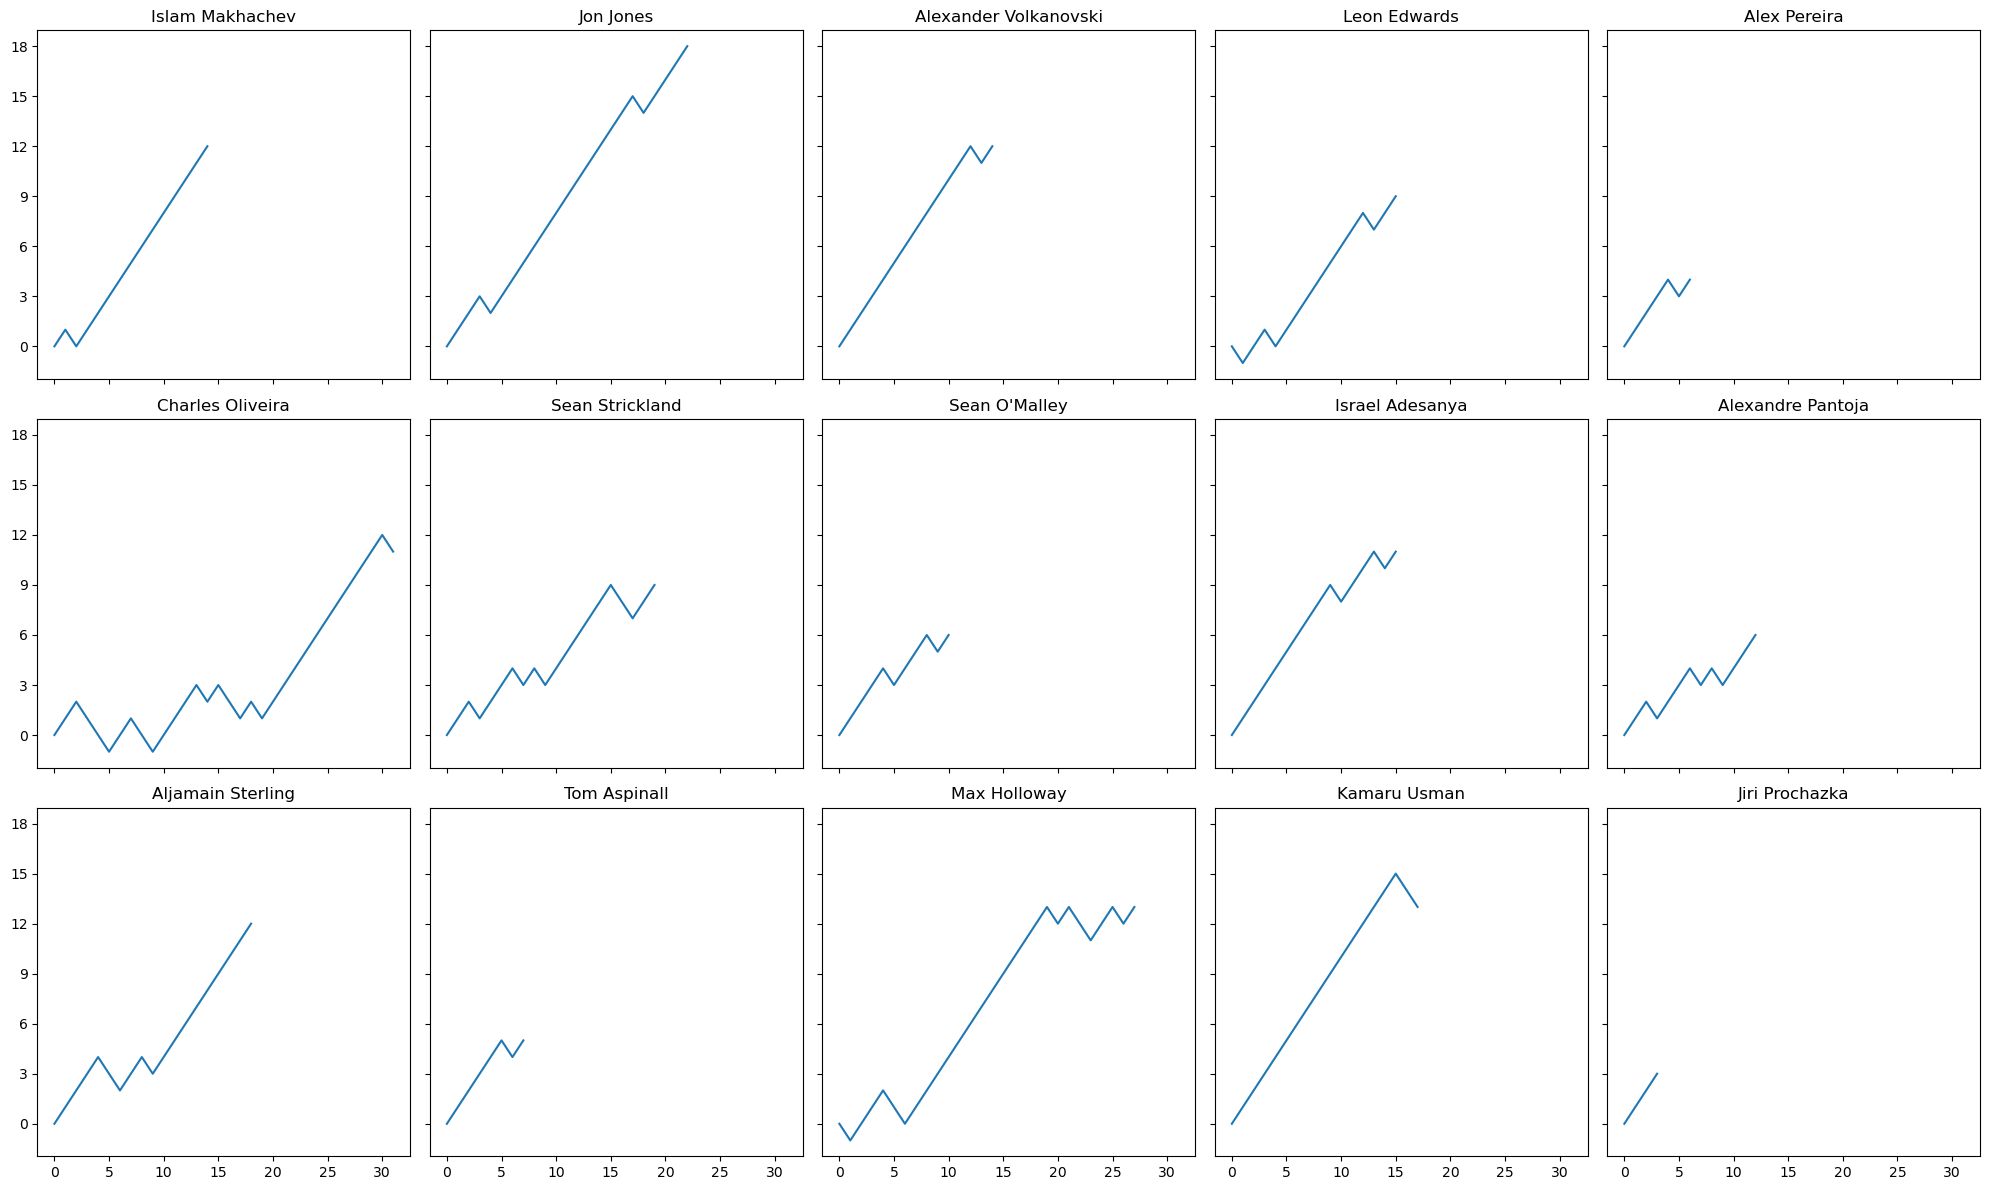

In [99]:
from matplotlib.ticker import MaxNLocator

p4p = np.array([
    "Islam Makhachev",
    "Jon Jones",
    "Alexander Volkanovski",
    "Leon Edwards",
    "Alex Pereira",
    "Charles Oliveira",
    "Sean Strickland",
    "Sean O'Malley",
    "Israel Adesanya",
    "Alexandre Pantoja",
    "Aljamain Sterling",
    "Tom Aspinall",
    "Max Holloway",
    "Kamaru Usman",
    "Jiri Prochazka",
])

fig, axes = plt.subplots(3, 5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

r_list = ["R_wins", "R_losses", "R_draw"]
b_list = ["B_wins", "B_losses", "B_draw"]

records = []

for i, fighter in enumerate(p4p):

    red_df = df[(df['R_fighter'] == fighter)]
    blue_df = df[(df['B_fighter'] == fighter)]

    red_record = red_df[["R_fighter", "B_fighter", "R_wins", "R_losses", "R_draw"]]
    red_record = red_record.rename(columns=lambda x: x[2:] if x in r_list else x)
    blue_record = blue_df[["R_fighter", "B_fighter", "B_wins", "B_losses", "B_draw"]]
    blue_record = blue_record.rename(columns=lambda x: x[2:] if x in b_list else x)
    total_record = pd.concat([red_record, blue_record]).sort_index()[::-1]

    diff = (total_record['wins'] - total_record['losses']).to_numpy()
    draw_diff = np.diff(total_record['draw'], 1, axis=0)
    draw_diff_indices = np.where(draw_diff != 0)[0]
    diff = np.insert(diff, draw_diff_indices, diff[draw_diff_indices])
    sns.lineplot(x=list(range(diff.shape[0])), y=diff, ax=axes[i])
    axes[i].set_title(fighter)
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))

    records.append([fighter, *total_record.iloc[-1:, 2:].to_numpy().ravel()])

plt.tight_layout()


The above plot shows the wins minus the losses at each time step (new fight) in the fighter's career. Looking at the above plots, it is clear that some fighters are exceptional from the beginning, only losing a few times in their career, e.g., Jon Jones and Islam Makhachev, whereas some fighters thrived later in their career, e.g., Charles Oliveira. In the case of the latter, the bumpy spikes indicate wins and losses early on, and a steep climb later on. 

It is noteworthy to mention that the last fights are not incorporated in this visualisation. Furthermore, the "No Contest" (NC) ruling is also regarded as a loss, as can be see in the plot of Jon Jones whose record is 27-1-0 (1 NC). 

<AxesSubplot: title={'center': 'P4P win/loss counts'}, ylabel='fighter'>

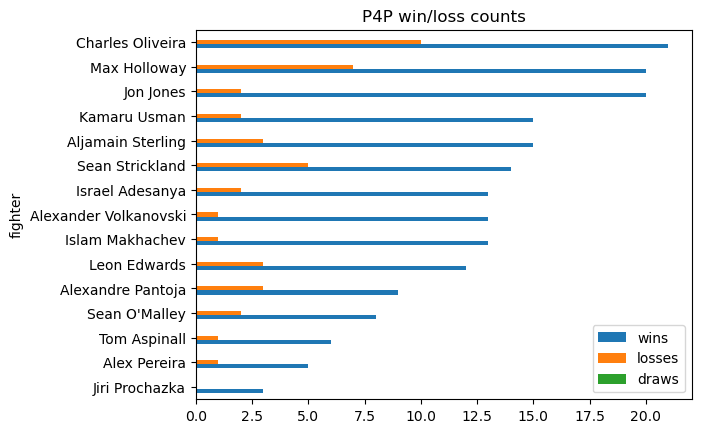

In [97]:
p4p_records = pd.DataFrame(records, columns=['fighter', 'wins', 'losses', 'draws']).sort_values('wins')

p4p_records.plot(x='fighter', kind='barh', title="P4P win/loss counts")

In [53]:
df[df['R_fighter'].str.contains('Prochazka') | df['B_fighter'].str.contains('Prochazka')]

R_fighter       B_fighter       Referee        date  \
41     Jiri Prochazka    Alex Pereira  Marc Goddard  2023-11-11   
790   Glover Teixeira  Jiri Prochazka  Marc Goddard  2022-06-11   
1361   Dominick Reyes  Jiri Prochazka     Herb Dean  2021-05-01   
1791  Volkan Oezdemir  Jiri Prochazka  Marc Goddard  2020-07-11   

                                        location Winner  title_bout  \
41                  New York City, New York, USA   Blue        True   
790                           Kallang, Singapore   Blue        True   
1361                      Las Vegas, Nevada, USA   Blue       False   
1791  Abu Dhabi, Abu Dhabi, United Arab Emirates   Blue       False   

          weight_class  B_avg_KD  B_avg_opp_KD  B_avg_SIG_STR_pct  \
41    LightHeavyweight   0.09375          0.25           0.670312   
790   LightHeavyweight   1.00000          0.00           0.505000   
1361  LightHeavyweight   1.00000          0.00           0.450000   
1791  LightHeavyweight       NaN           NaN                NaN   

      B_avg_opp_SIG_STR_pct  B_avg_TD_pct  B_avg_opp_TD_pct  B_avg_SUB_ATT  \
41                 0.544063         0.125          0.232813            0.5   
790                0.510000         0.500          0.500000            0.0   
1361               0.440000         0.000          0.000000            0.0   
1791                    NaN           NaN               NaN            NaN   

      B_avg_opp_SUB_ATT  B_avg_REV  B_avg_opp_REV  B_avg_SIG_STR_att  \
41                  1.0        0.0            0.0           95.53125   
790                 0.5        0.0            0.0          104.50000   
1361                0.0        0.0            0.0           73.00000   
1791                NaN        NaN            NaN                NaN   

      B_avg_SIG_STR_landed  B_avg_opp_SIG_STR_att  B_avg_opp_SIG_STR_landed  \
41                63.90625                   91.5                    49.875   
790               55.00000                  100.0                    52.000   
1361              33.00000                   92.0                    41.000   
1791                   NaN                    NaN                       NaN   

      B_avg_TOTAL_STR_att  B_avg_TOTAL_STR_landed  B_avg_opp_TOTAL_STR_att  \
41                  128.0                   93.25                116.03125   
790                 105.0                   55.50                104.50000   
1361                 73.0                   33.00                 95.00000   
1791                  NaN                     NaN                      NaN   

      B_avg_opp_TOTAL_STR_landed  B_avg_TD_att  B_avg_TD_landed  \
41                      69.65625         0.125            0.125   
790                     56.00000         0.500            0.500   
1361                    44.00000         0.000            0.000   
1791                         NaN           NaN              NaN   

      B_avg_opp_TD_att  B_avg_opp_TD_landed  B_avg_HEAD_att  \
41             4.96875                 1.75          46.125   
790            1.00000                 0.50          93.000   
1361           1.00000                 0.00          67.000   
1791               NaN                  NaN             NaN   

      B_avg_HEAD_landed  B_avg_opp_HEAD_att  B_avg_opp_HEAD_landed  \
41              22.5625            66.28125                   32.0   
790             45.0000            78.50000                   34.5   
1361            29.0000            76.00000                   30.0   
1791                NaN                 NaN                    NaN   

      B_avg_BODY_att  B_avg_BODY_landed  B_avg_opp_BODY_att  \
41              24.0            20.8125             14.6875   
790             11.0             9.5000             15.0000   
1361             5.0             3.0000              6.0000   
1791             NaN                NaN                 NaN   

      B_avg_opp_BODY_landed  B_avg_LEG_att  B_avg_LEG_landed  \
41                     8.75       25.40625          

In [48]:
df.filter(like="Ji", axis=2)

ValueError: No axis named 2 for object type DataFrame

In [ ]:
r_list = ["R_wins", "R_losses", "R_draw"]
b_list = ["B_wins", "B_losses", "B_draw"]
for fighter in df[['R_fighter', 'B_fighter']].unstack().unique()[:100]:

    red_df = df[(df['R_fighter'] == fighter)]
    blue_df = df[(df['B_fighter'] == fighter)]

    red_record = red_df[["R_fighter", "B_fighter", "R_wins", "R_losses", "R_draw"]]
    red_record = red_record.rename(columns=lambda x: x[2:] if x in r_list else x)
    blue_record = blue_df[["R_fighter", "B_fighter", "B_wins", "B_losses", "B_draw"]]
    blue_record = blue_record.rename(columns=lambda x: x[2:] if x in b_list else x)
    total_record = pd.concat([red_record, blue_record]).sort_index()[::-1]

    diff = (total_record['wins'] - total_record['losses']).to_numpy()
    draw_diff = np.diff(total_record['draw'], 1, axis=0)
    draw_diff_indices = np.where(draw_diff != 0)[0]
    diff = np.insert(diff, draw_diff_indices, diff[draw_diff_indices])
    sns.lineplot(x=list(range(diff.shape[0])), y=diff, label=fighter)
plt.legend()

In [130]:
diff = (total_jones_record['wins'] - total_jones_record['losses']).to_numpy()
draw_diff = np.diff(total_jones_record['draw'], 1, axis=0)
# draw_diff = np.zeros((diff.shape[0]-1))
# draw_diff[5] = 1
# draw_diff[10] = 2
draw_diff_indices = np.where(draw_diff != 0)[0]
diff = np.insert(diff, draw_diff_indices, diff[draw_diff_indices])
# diff

array([ 0,  1,  2,  3,  2,  3,  3,  4,  5,  6,  7,  8,  8,  9, 10, 11, 12,
       13, 14, 15, 14, 15, 16, 17, 18], dtype=int64)

<AxesSubplot: ylabel='diff'>

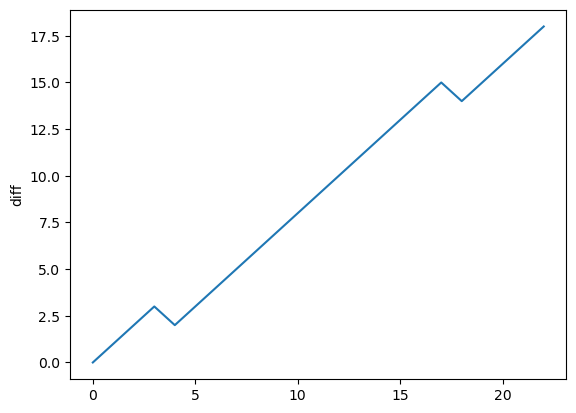

In [84]:
sns.lineplot(total_jones_record, x=range(total_jones_record.shape[0]), y='diff')

In [ ]:
sns.lineplot()

In [16]:
df.head(1).filter(regex='^R_.*').columns

Index(['R_fighter', 'R_avg_KD', 'R_avg_opp_KD', 'R_avg_SIG_STR_pct',
       'R_avg_opp_SIG_STR_pct', 'R_avg_TD_pct', 'R_avg_opp_TD_pct',
       'R_avg_SUB_ATT', 'R_avg_opp_SUB_ATT', 'R_avg_REV', 'R_avg_opp_REV',
       'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_opp_SIG_STR_att',
       'R_avg_opp_SIG_STR_landed', 'R_avg_TOTAL_STR_att',
       'R_avg_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_att',
       'R_avg_opp_TOTAL_STR_landed', 'R_avg_TD_att', 'R_avg_TD_landed',
       'R_avg_opp_TD_att', 'R_avg_opp_TD_landed', 'R_avg_HEAD_att',
       'R_avg_HEAD_landed', 'R_avg_opp_HEAD_att', 'R_avg_opp_HEAD_landed',
       'R_avg_BODY_att', 'R_avg_BODY_landed', 'R_avg_opp_BODY_att',
       'R_avg_opp_BODY_landed', 'R_avg_LEG_att', 'R_avg_LEG_landed',
       'R_avg_opp_LEG_att', 'R_avg_opp_LEG_landed', 'R_avg_DISTANCE_att',
       'R_avg_DISTANCE_landed', 'R_avg_opp_DISTANCE_att',
       'R_avg_opp_DISTANCE_landed', 'R_avg_CLINCH_att', 'R_avg_CLINCH_landed',
       'R_avg_opp_CLINCH_att',

In [39]:
# df[]
df.isnull() == True

R_fighter  B_fighter  Referee   date  location  Winner  title_bout  \
0         False      False    False  False     False   False       False   
1         False      False    False  False     False   False       False   
2         False      False    False  False     False   False       False   
3         False      False    False  False     False   False       False   
4         False      False    False  False     False   False       False   
...         ...        ...      ...    ...       ...     ...         ...   
7419      False      False    False  False     False   False       False   
7420      False      False    False  False     False   False       False   
7421      False      False    False  False     False   False       False   
7422      False      False    False  False     False   False       False   
7423      False      False    False  False     False   False       False   

      weight_class  B_avg_KD  B_avg_opp_KD  ...  R_win_by_Decision_Unanimous  \
0            False     False         False  ...                        False   
1            False     False         False  ...                        False   
2            False     False         False  ...                        False   
3            False     False         False  ...                        False   
4            False     False         False  ...                        False   
...            ...       ...           ...  ...                          ...   
7419         False      True          True  ...                        False   
7420         False      True          True  ...                        False   
7421         False      True          True  ...                        False   
7422         False      True          True  ...                        False   
7423         False      True          True  ...                        False   

      R_win_by_KO/TKO  R_win_by_Submission  R_win_by_TKO_Doctor_Stoppage  \
0               False                False                         False   
1               False                False                         False   
2               False                False                         False   
3               False                False                         False   
4               False                False                         False   
...               ...                  ...                           ...   
7419            False                False                         False   
7420            False                False                         False   
7421            False                False                         False   
7422            False                False                         False   
7423            False                False                         False   

      R_Stance  R_Height_cms  R_Reach_cms  R_Weight_lbs  B_age  R_age  
0        False         False        False         False  False  False  
1        False         False        False         False  False  False  
2        False         False        False         False  False  False  
3        False         False        False         False  False  False  
4        False         False        False         False  False  False  
...        ...           ...          ...           ...    ...    ...  
7419     False         False         True         False   True   True  
7420     False         False         True         False   True   True  
7421     False         False         True         False   True  False  
7422     False         False         True         False  False   True  
7423      True          True         True          True   True   True  

[7424 rows x 144 columns]

[0,
 0,
 33,
 0,
 0,
 2,
 0,
 0,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 55,
 10,
 882,
 8,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 39,
 22,
 418,
 20,
 172,
 81]